<a href="https://colab.research.google.com/github/sourav03dutta/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
#### **NAME**  -  **Sourav Dutta**, Cohort Montreal, ALMABETTER

# **Project Summary -**

This project is aimed at predicting and gather insights of Netflix Movies and TV Shows.

We will import NumPy, pandas, matplotlib, seaborn, sklearn models and other librarires in Google Colab then mount the drive. After that we will read csv file from working directory path and assigned it into the data frame. The dataset description is given below :-

1. show_id : Unique ID for every Movie/TV Show
2. type : Identifier - Movie/TV Show
3. title : Title of the Movie/TV Show
4. director : Director of the Movie/TV Show
5. cast : Actors involved in the Movie/TV Show
6. country : Country where the Movie/TV Show was produced
7. date_added : Date it was added on Netflix
8. release_year : Actual Release year of the Movie/TV Show
9. rating : TV Rating of the Movie/TV Show
10. duration : Total Duration - in minutes or number of seasons
11. listed_in : Genre
12. description: The Summary description

In this dataset, there are 7787 rows and 12 columns. The dataset contains no duplicate values and identified null values or missing values. After Data Wrangling, Exploratory Data Analysis is done to get data visualization and deeper insights of the datasets. In feature engineering, feature selection is done. Textual Data Preprocessing is done. Principal Component Analysis is done to reduce the dimensions.  Topic Modelling with Gensim is done to gather deeper insights of the dataset. In Machine Learning, K Means Clustering, DBSCAN, Hierarchial Agglomerative Clustering is apllied.

I choose K Means Clustering from the above models as my final prediction model because
1. Silhouette Coefficient is better than the other two models.
2. Davies-Bouldin Index is lower than the other two models. Lower values indiacating better clustering.
3. Calinski-Harabasz Score is much decent than the other two models.




# **GitHub Link -**

https://github.com/sourav03dutta/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating, this dataset with other external datasets such as IMDB ratings, roten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import missingno as msno

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

working_dir_path = '/content/drive/My Drive/Almabetter Projects/Machine Learning - Unsupervised ML/NETFLIX Movies and TV Shows Clustering/'
Netflix_Data = pd.read_csv(working_dir_path + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look

Netflix_Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

Netflix_Data.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info

Netflix_Data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

Netflix_Data.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

Netflix_Data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

director's null rate :30.68%

cast's null rate :9.22%

country's null rate :6.51%

date_added's null rate :0.13%

rating's null rate :0.09%



<Axes: >

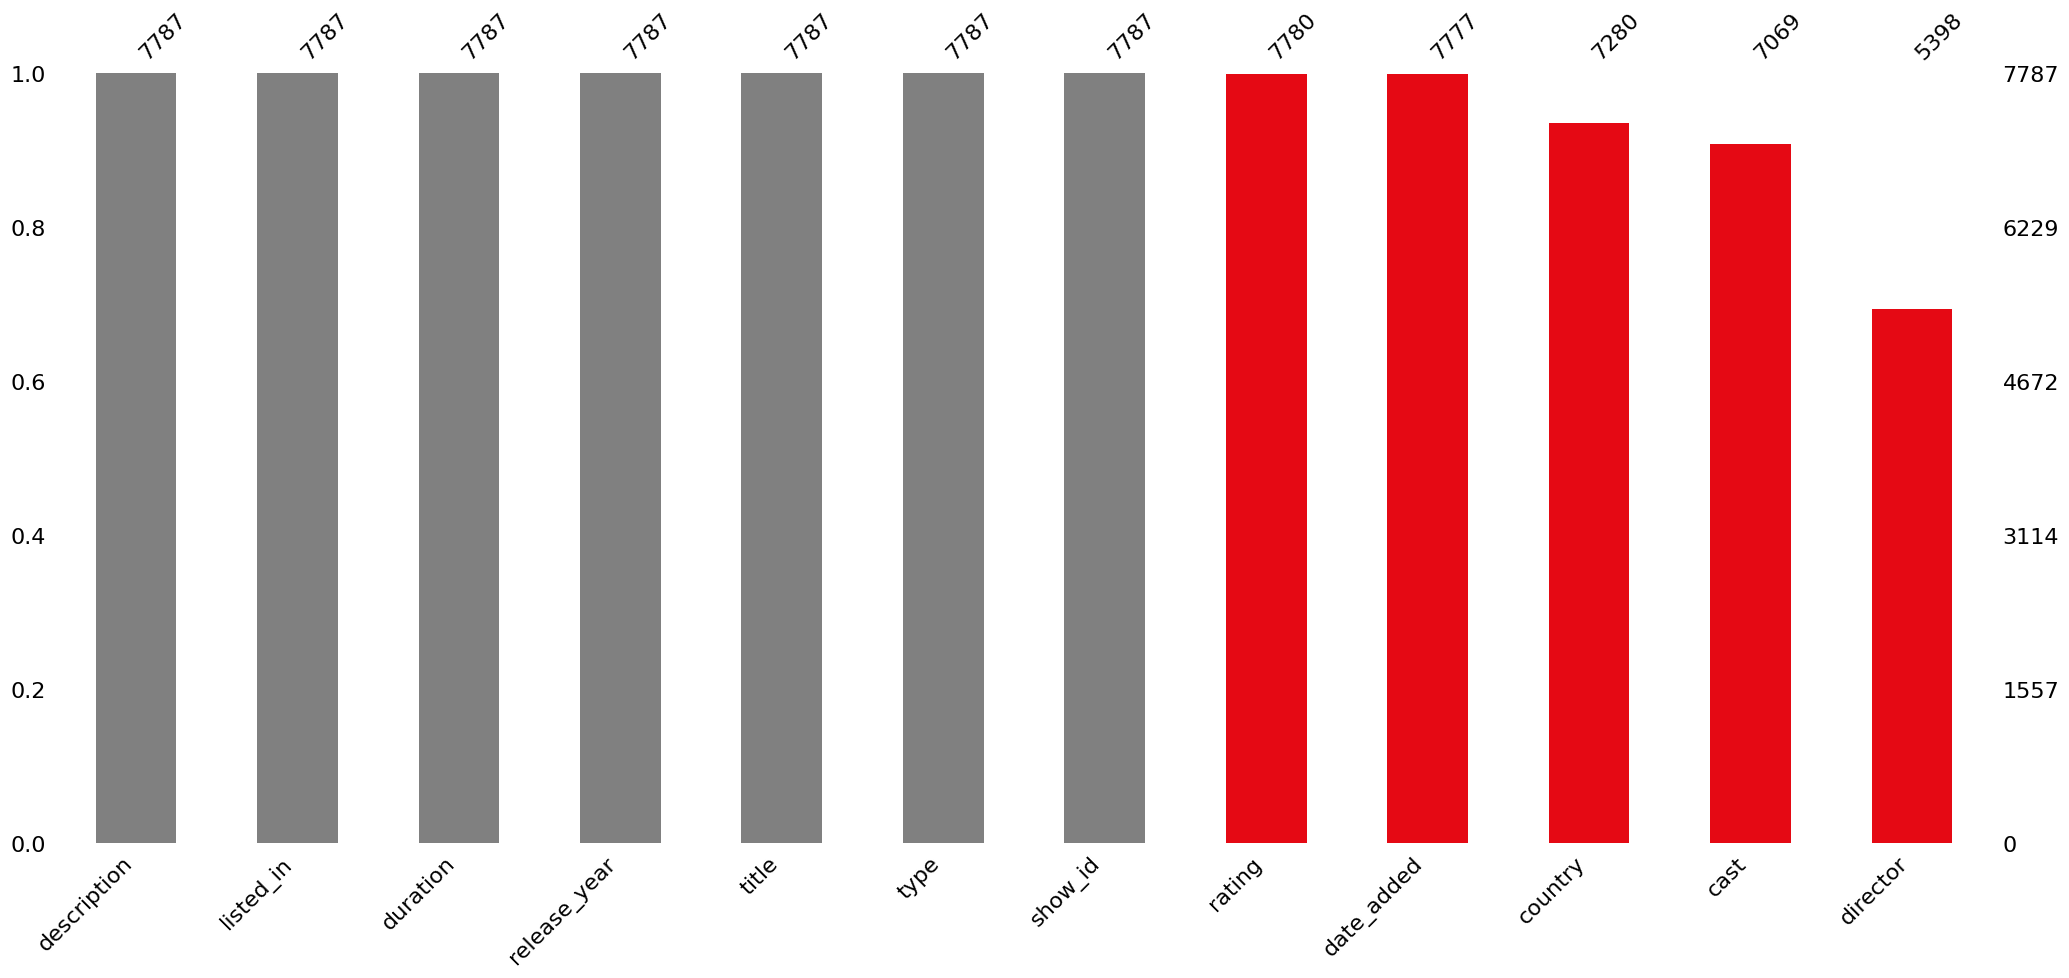

In [8]:
#print missing values
for i in Netflix_Data.columns:
    null_rate = Netflix_Data[i].isna().sum() / len(Netflix_Data) * 100
    if null_rate > 0 :
        print("{}'s null rate :{}%\n".format(i,round(null_rate,2)))

# Visualizing the missing values
color = ['grey','grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914','#E50914']
msno.bar(Netflix_Data, color = color, sort = 'descending')

### What did you know about your dataset?

The dataset is all about Netflix movies and tv shows which includes show_id, type, title, director, cast country, date_added, release_year, rating, duration, listed_in, description.

In this dataset, there are 7787 rows and 12 columns.

The dataset contains no duplicate values.

The columns which contains Missing values/Null values given below :-

1.  show_id - 0
2.  type - 0
3.  title - 0
4.  director - 2389
5.  cast - 718
6.  country - 507
7.  date_added - 10
8.  release_year - 0
9.  rating - 7
10. duration - 0
11. listed_in - 0
12. description - 0

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

Netflix_Data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe

Netflix_Data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

1. show_id : Unique ID for every Movie/TV Show
2. type : Identifier - Movie/TV Show
3. title : Title of the Movie/TV Show
4. director : Director of the Movie/TV Show
5. cast : Actors involved in the Movie/TV Show
6. country : Country where the Movie/TV Show was produced
7. date_added : Date it was added on Netflix
8. release_year : Actual Release year of the Movie/TV Show
9. rating : TV Rating of the Movie/TV Show
10. duration : Total Duration - in minutes or number of seasons
11. listed_in : Genre
12. description: The Summary description


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

Netflix_Data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [12]:
print(f"Unique Values present in show_id_Column are : {Netflix_Data['show_id'].unique()}\n\n")
print(f"Unique Values present in type_Column are : {Netflix_Data['type'].unique()}\n\n")
print(f"Unique Values present in title_Column are : {Netflix_Data['title'].unique()}\n\n")
print(f"Unique Values present in director_Column are : {Netflix_Data['director'].unique()}\n\n")
print(f"Unique Values present in cast_Column are : {Netflix_Data['cast'].unique()}\n\n")
print(f"Unique Values present in country_Column are : {Netflix_Data['country'].unique()}\n\n")
print(f"Unique Values present in date_added_Column are : {Netflix_Data['date_added'].unique()}\n\n")
print(f"Unique Values present in release_year_Column are : {Netflix_Data['release_year'].unique()}\n\n")
print(f"Unique Values present in rating_Column are : {Netflix_Data['rating'].unique()}\n\n")
print(f"Unique Values present in duration_Column are : {Netflix_Data['duration'].unique()}\n\n")
print(f"Unique Values present in listed_in_Column are : {Netflix_Data['listed_in'].unique()}\n\n")
print(f"Unique Values present in description_Column are : {Netflix_Data['description'].unique()}\n\n")

Unique Values present in show_id_Column are : ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']


Unique Values present in type_Column are : ['TV Show' 'Movie']


Unique Values present in title_Column are : ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]


Unique Values present in director_Column are : [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']


Unique Values present in cast_Column are : ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaran

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

Netflix_Data = Netflix_Data.rename(columns={'show_id': 'Show_ID', 'type':'Type', 'title':'Title', 'director':'Director', 'cast':'Cast', 'country':'Country', 'date_added':'Netflix_Date_Added', 'release_year':'Release_Year', 'rating':'Rating', 'duration':'Duration', 'listed_in':'Genre', 'description':'Description'})
Netflix_Data.head()

,Show_ID,Type,Title,Director,Cast,Country,Netflix_Date_Added,Release_Year,Rating,Duration,Genre,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### What all manipulations have you done and insights you found?

1. No duplicate values
2. Missing/Null values identified
3. Checked for unique values.
4. Renamed all the columns in proper way.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

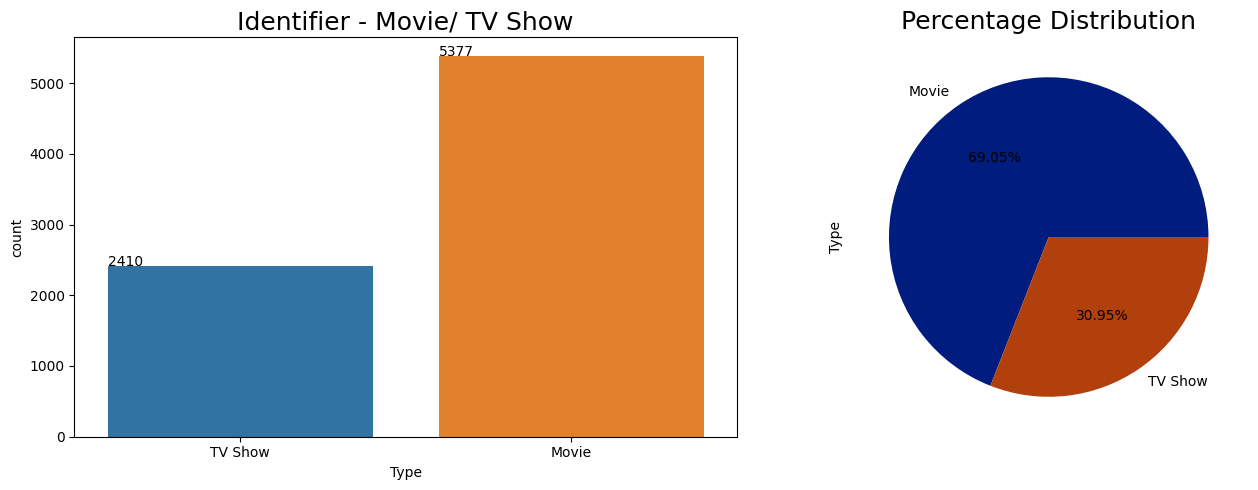

In [14]:
# Chart - 1 visualization code

fig,ax = plt.subplots(1,2, figsize=(14,5))

# Countplot
graph = sns.countplot(x=Netflix_Data['Type'], ax=ax[0])
graph.set_title('Identifier - Movie/ TV Show', size=18)

# adding value count on the top of bar

for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Piechart
Netflix_Data['Type'].value_counts().plot(kind='pie', colors=sns.color_palette('dark'), autopct='%1.2f%%', ax=ax[1])
plt.title('Percentage Distribution', size=18)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Chart** - A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

**Pie Chart** - A pie chart (or a circle chart) is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area) is proportional to the quantity it represents. While it is named for its resemblance to a pie which has been sliced, there are variations on the way it can be presented. The earliest known pie chart is generally credited to William Playfair's Statistical Breviary of 1801.

##### 2. What is/are the insight(s) found from the chart?

1. There are 5377 Movies and 2410 TV Shows in the given dataset.
2. Movie contains 69% of the data where as TV Show contains 21% of the data.


#### Chart - 2

In [15]:
Director_TV_Shows = Netflix_Data[Netflix_Data['Type']=='TV Show']['Director'].value_counts().sum()
Director_Movies = Netflix_Data[Netflix_Data['Type']=='Movie']['Director'].value_counts().sum()
print(f"Number of Movies directed by director is : {Director_Movies}")
print(f"Number of TV Shows directed by director is : {Director_TV_Shows}")

Number of Movies directed by director is : 5214
Number of TV Shows directed by director is : 184


Text(0.5, 1.0, 'Top 10 director who directed Movies')

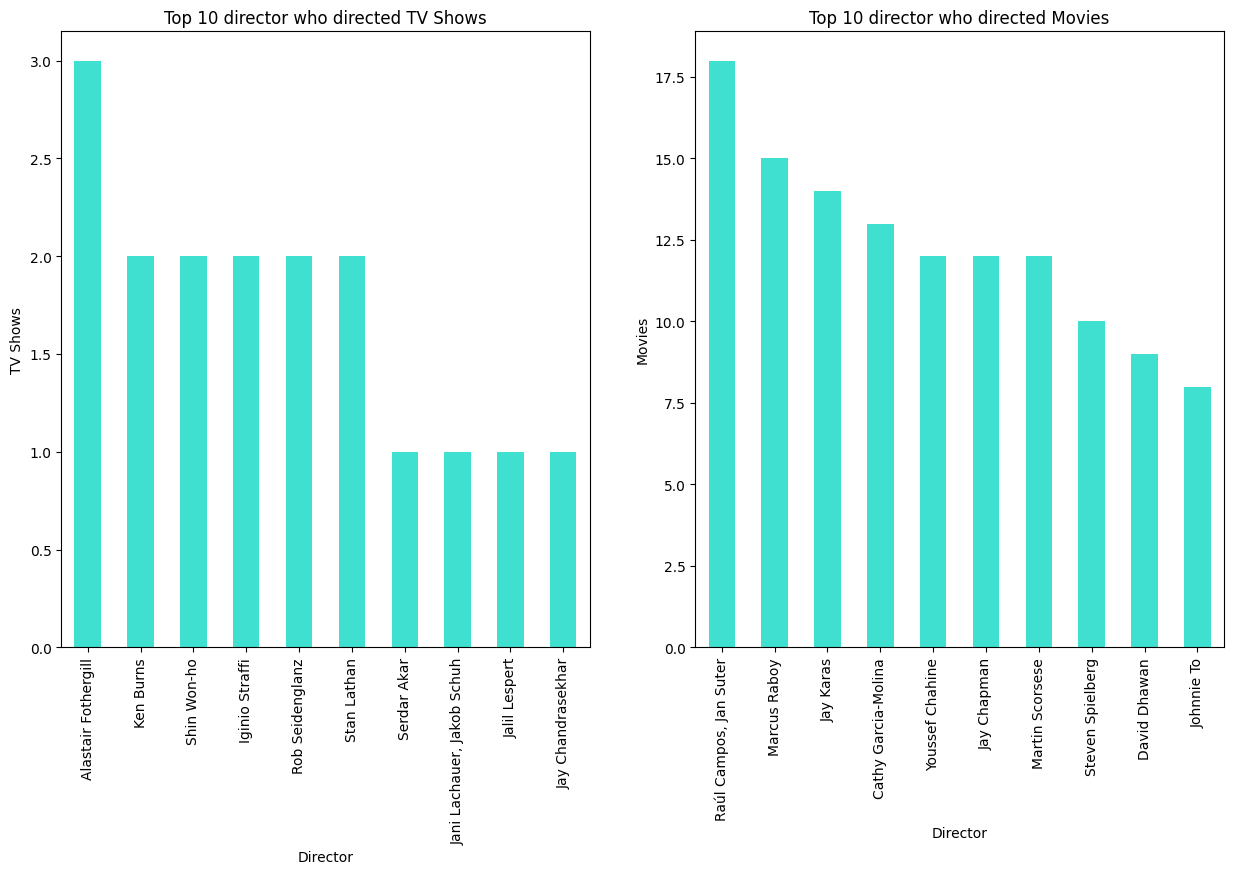

In [16]:
# Chart - 2 visualization code

Figure = plt.figure(figsize=(15,8))
ax0=Figure.add_subplot(1,2,1)
ax1=Figure.add_subplot(1,2,2)

# Top 10 Director who directed TV show

TV_Shows = Netflix_Data[Netflix_Data['Type']=='TV Show']['Director'].value_counts()[:10].plot(kind='bar', color='Turquoise', ax=ax0)
plt.xticks(rotation=90)
ax0.set_xlabel('Director')
ax0.set_ylabel('TV Shows')
ax0.set_title('Top 10 director who directed TV Shows')

# Top 10 Director who directed movie

Movies = Netflix_Data[Netflix_Data['Type']=='Movie']['Director'].value_counts()[:10].plot(kind='bar', color='Turquoise', ax=ax1)
plt.xticks(rotation=90)
ax1.set_xlabel('Director')
ax1.set_ylabel('Movies')
ax1.set_title('Top 10 director who directed Movies')

##### What is/are the insight(s) found from the chart?

1. Alastair Fothergill directed 3 TV Shows, higher than anyone in the given dataset.
2. Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the given dataset.


#### Chart - 3

In [17]:
# Seperating actor from cast column

Cast = Netflix_Data['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Top actors name who play highest role in MovieS/TV Shows.

Cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [18]:
print(f"Total number of TV Show Actors : {len(Netflix_Data[Netflix_Data['Type']=='TV Show']['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")
print(f"Total number of Movie Actors : {len(Netflix_Data[Netflix_Data['Type']=='Movie']['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")

Total number of TV Show Actors : 13585
Total number of Movie Actors : 23049


Text(0.5, 1.0, 'Top 10 Actor who acted in Movies')

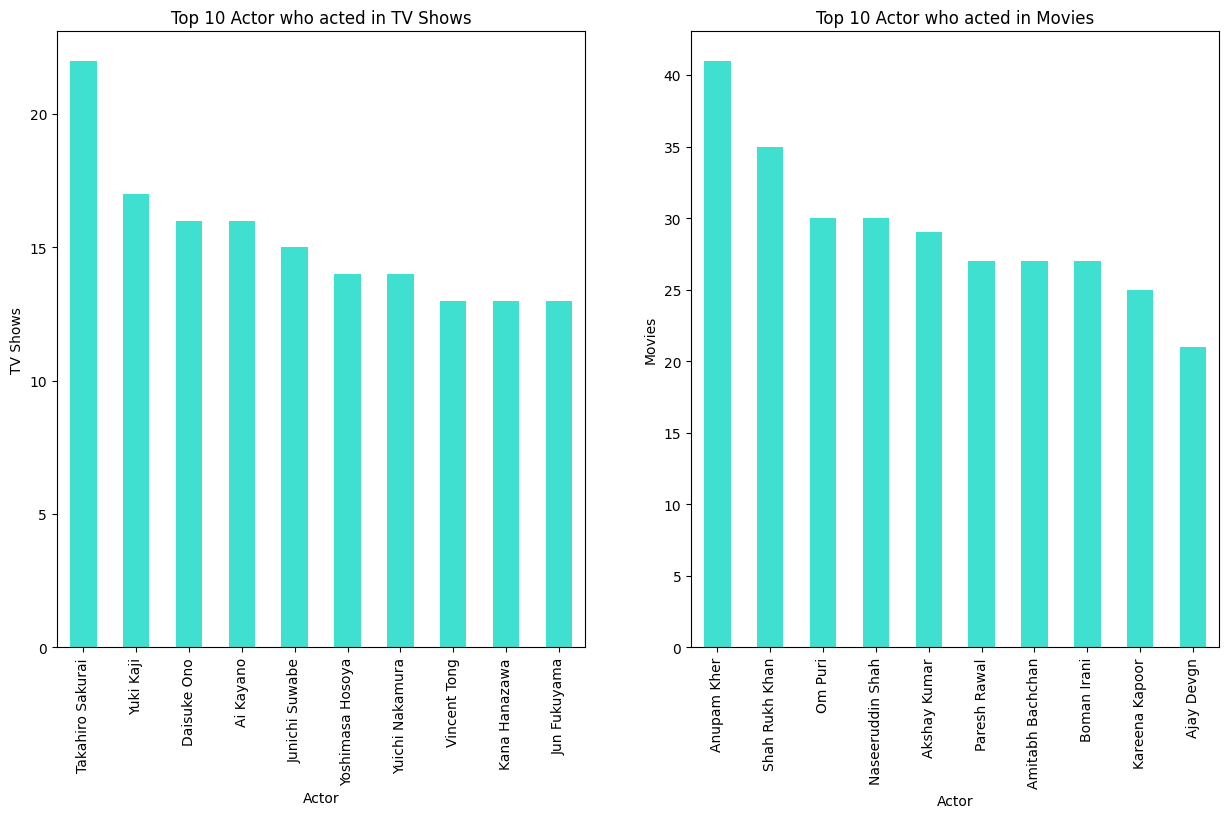

In [19]:
# Chart - 3 visualization code

Figure = plt.figure(figsize=(15,8))
ax0=Figure.add_subplot(1,2,1)
ax1=Figure.add_subplot(1,2,2)

# Top 10 Director who directed TV show

TV_Shows = Netflix_Data[Netflix_Data['Type']=='TV Show']['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='bar', color='Turquoise', ax=ax0)
plt.xticks(rotation=90)
ax0.set_xlabel('Actor')
ax0.set_ylabel('TV Shows')
ax0.set_title('Top 10 Actor who acted in TV Shows')

# Top 10 Director who directed movie

Movies = Netflix_Data[Netflix_Data['Type']=='Movie']['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='bar', color='Turquoise', ax=ax1)
plt.xticks(rotation=90)
ax1.set_xlabel('Actor')
ax1.set_ylabel('Movies')
ax1.set_title('Top 10 Actor who acted in Movies')

##### What is/are the insight(s) found from the chart?

1. Total number of TV Show Actors : 13585
2. Total number of Movie Actors : 23049
3. Takahiro Sakurai acted in highest number of TV Shows.
4. Anupam Kher acted in 42 movies followed by Shahrukh Khan - 35 and Om Puri, Naseeruddin Shah - 30

#### Chart - 4

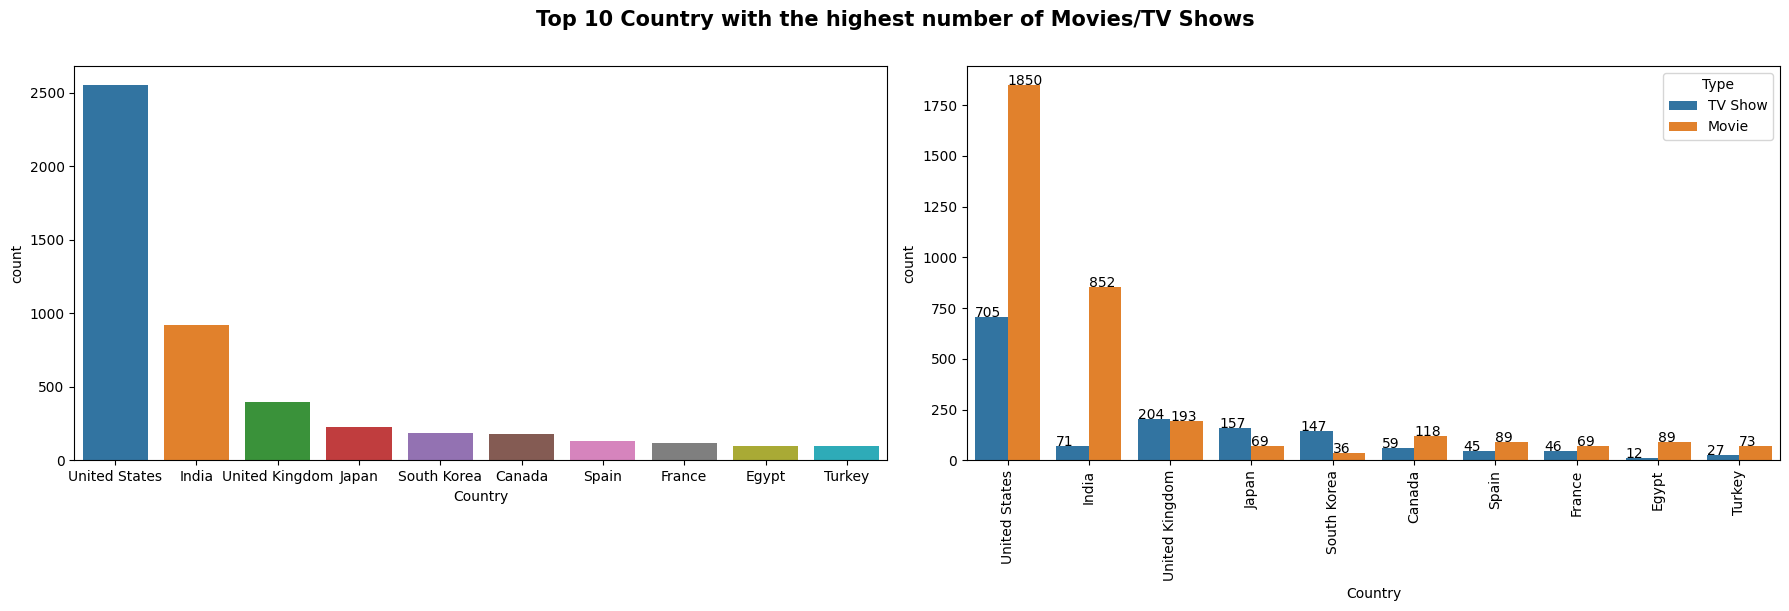

In [20]:
# Chart - 4 visualization code

fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 Country with the highest number of Movies/TV Shows', weight='bold', size=15, y=1.01)

# Univariate Analysis
sns.countplot(x='Country', data=Netflix_Data, order=Netflix_Data['Country'].value_counts().index[0:10], ax=ax[0])

# Bivariate Analysis
graph = sns.countplot(x="Country", data=Netflix_Data, hue='Type', order=Netflix_Data['Country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

In [21]:
# Percentage share of Movies / TV Shows by top 10 countries
Netflix_Data['Country'].value_counts().nlargest(10).sum()/len(Netflix_Data)*100

63.06664954411198

##### What is/are the insight(s) found from the chart?

The highest number of Movies / TV shows are with United States, followed by India and United Kingdom.

United States - 705 TV Shows - 1850 Movies

India - 71 TV Shows - 852 Movies

United Kingdom - 204 TV Shows - 193 Movies

63.06% of Movies and TV Shows by Top 10 countries.




#### Chart - 5

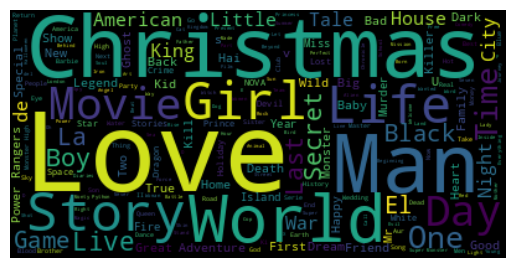

In [22]:
# Chart - 5 visualization code

# Text documents
text = " ".join(word for word in Netflix_Data['Title'])

# Create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# Plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

**Word Clouds** - Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the documents. This type of visualization can assist evaluators with exploratory textual analysis by identifying words that frequently appear in a set of interviews, documents, or other text. It can also be used for communicating the most salient points or themes in the reporting stage.

##### 2. What is/are the insight(s) found from the chart?

 Words like "Christmas", "Love", "World", "Man", "Story", "Life", "Girl", "Movie", "One", "Time" are very common word which appears most of the time in 'Title' column.

#### Chart - 6

In [23]:
print(f'Oldest release year of Movies/TV Shows : {Netflix_Data.Release_Year.min()}')
print(f'Latest release year of Movies/TV Shows : {Netflix_Data.Release_Year.max()}')

Oldest release year of Movies/TV Shows : 1925
Latest release year of Movies/TV Shows : 2021


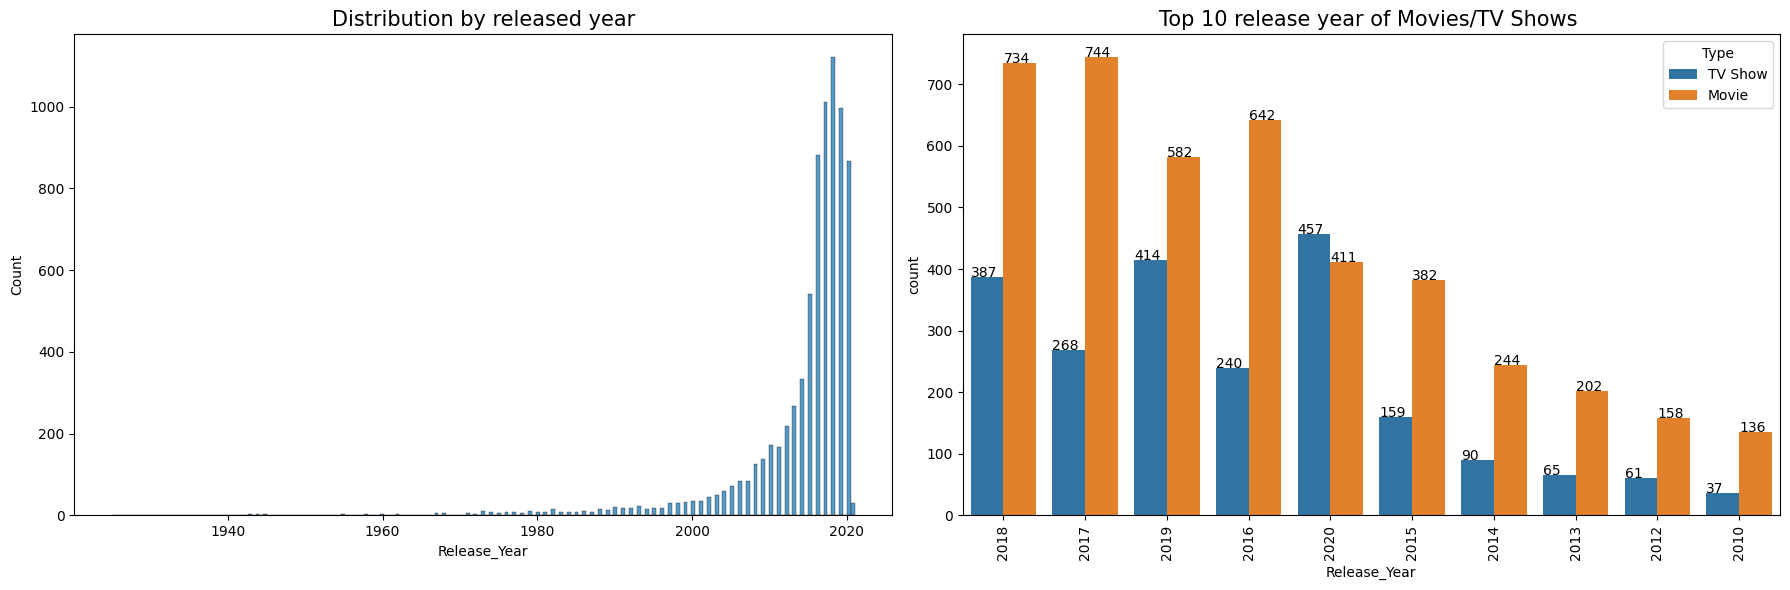

In [24]:
# Chart - 6 visualization code

fig,ax = plt.subplots(1,2, figsize=(18,6))

# Univariate Analysis

hist = sns.histplot(Netflix_Data['Release_Year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate Analysis
count = sns.countplot(x="Release_Year", hue='Type', data=Netflix_Data, order=Netflix_Data['Release_Year'].value_counts().index[0:10], ax=ax[1])
count.set_title('Top 10 release year of Movies/TV Shows ', size=15)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in count.patches:
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Histogram** - A histogram is a graphical representation of a grouped frequency distribution with continuous classes. It is an area diagram and can be defined as a set of rectangles with bases along with the intervals between class boundaries and with areas proportional to frequencies in the corresponding classes. In such representations, all the rectangles are adjacent since the base covers the intervals between class boundaries. The heights of rectangles are proportional to corresponding frequencies of similar classes and for different classes, the heights will be proportional to corresponding frequency densities.

Bar Chart explained is already in Chart - 1

##### 2. What is/are the insight(s) found from the chart?

Oldest release year of Movies/TV Shows : 1925

Latest release year of Movies/TV Shows : 2021

Highest number of TV Shows released in the year 2020 - 457

Highest number of Movies released in the year 2017 - 744

#### Chart - 7

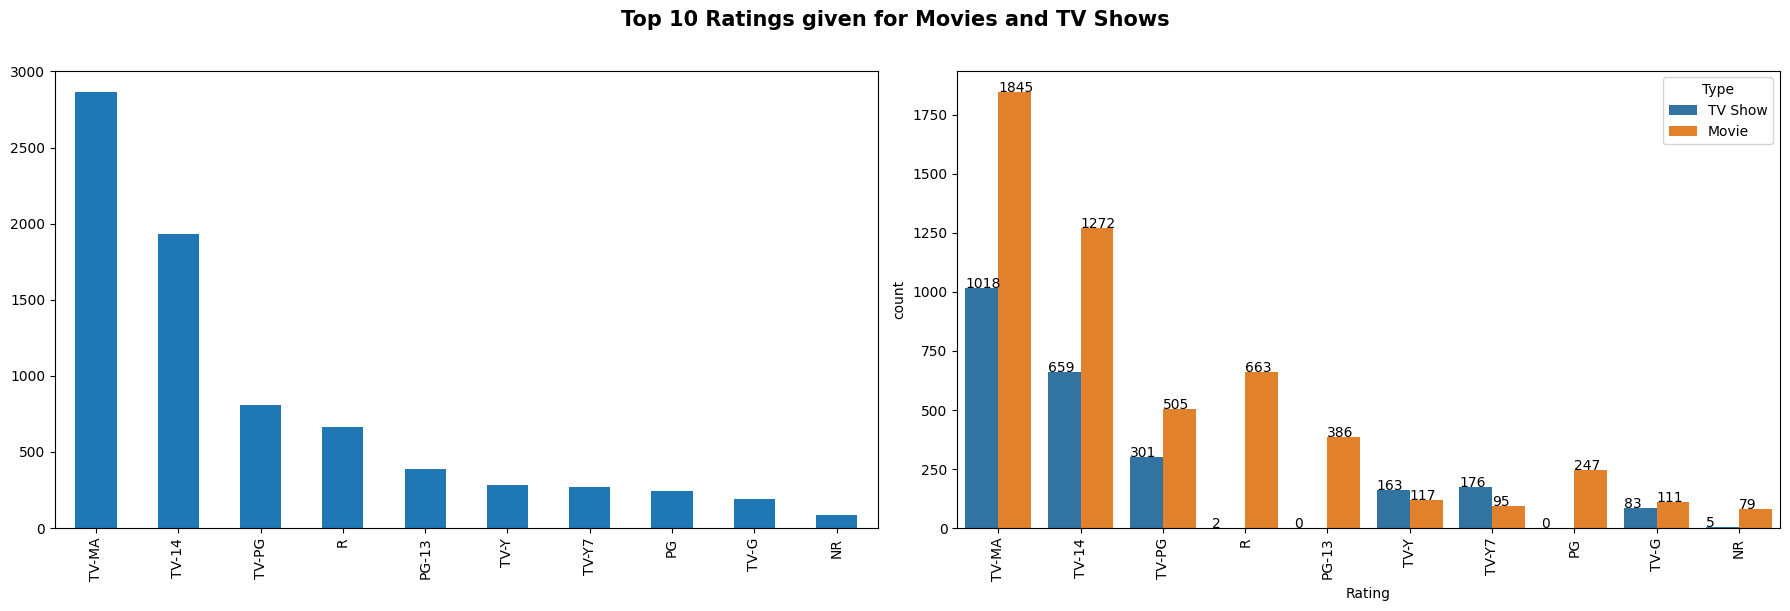

In [25]:
# Chart - 7 visualization code

fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 Ratings given for Movies and TV Shows', weight='bold', size=15, y=1.01)

# Univariate Analysis
Netflix_Data.Rating.value_counts()[:10].plot(kind='bar', ax=ax[0])

# Bivariate Analysis
graph = sns.countplot(x='Rating', data=Netflix_Data, hue='Type', order=Netflix_Data['Rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?

Most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).

Highest number of rating given for the Movies as compared to TV Shows because number of Movies are greater than number of TV Movies.

#### Chart - 8

In [26]:
# seperating Genre columns for analysis purpose
genres = Netflix_Data['Genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Top 10 genre in listed Movies/TV Shows
genres = genres.value_counts()[:15].sort_index().to_frame().reset_index().rename(columns={'index':'Genre', 0:'Counts'})
genres

,Genre,Counts
0,Action & Adventure,721
1,Children & Family Movies,532
2,Comedies,1471
3,Crime TV Shows,427
4,Documentaries,786
5,Docuseries,353
6,Dramas,2106
7,Independent Movies,673
8,International Movies,2437
9,International TV Shows,1199


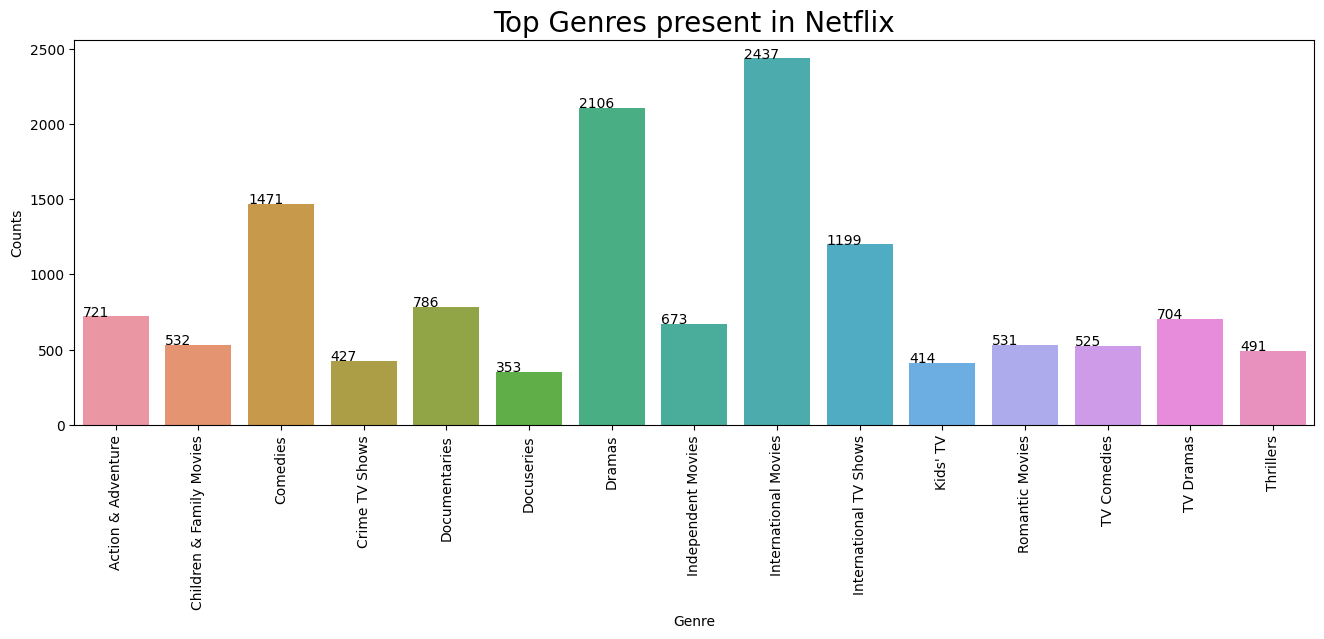

In [27]:
# Chart - 8 visualization code

plt.figure(figsize=(16,5))
graph = sns.barplot(x = 'Genre', y = 'Counts', data=genres)
graph.set_title('Top Genres present in Netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

##### What is/are the insight(s) found from the chart?

Highest number of Genre belongs from International Movies, Dramas, Comedies,International TV Shows respectively.

Least number of Genre belongs from Docuseries, Kid's TV, Crime TV Shows, Thrilers respectively.


#### Chart - 9

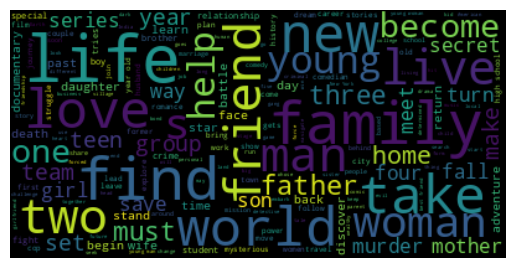

In [28]:
# Chart - 9 visualization code

# text documents
text = " ".join(word for word in Netflix_Data['Description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### What is/are the insight(s) found from the chart?

Most of the common words present in 'Description' column are "family", "find", "life", "new", "world", "take".

#### Chart - 10

In [29]:
Netflix_Data['Duration']=Netflix_Data['Duration'].str.replace('Season','')
Netflix_Data['Duration']=Netflix_Data['Duration'].str.replace('s','')
Netflix_Data['Duration']=Netflix_Data['Duration'].str.replace('min','')

Netflix_Data['Duration']=Netflix_Data['Duration'].astype(str).astype(int)
Netflix_Data['Duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: Duration, Length: 7787, dtype: int64

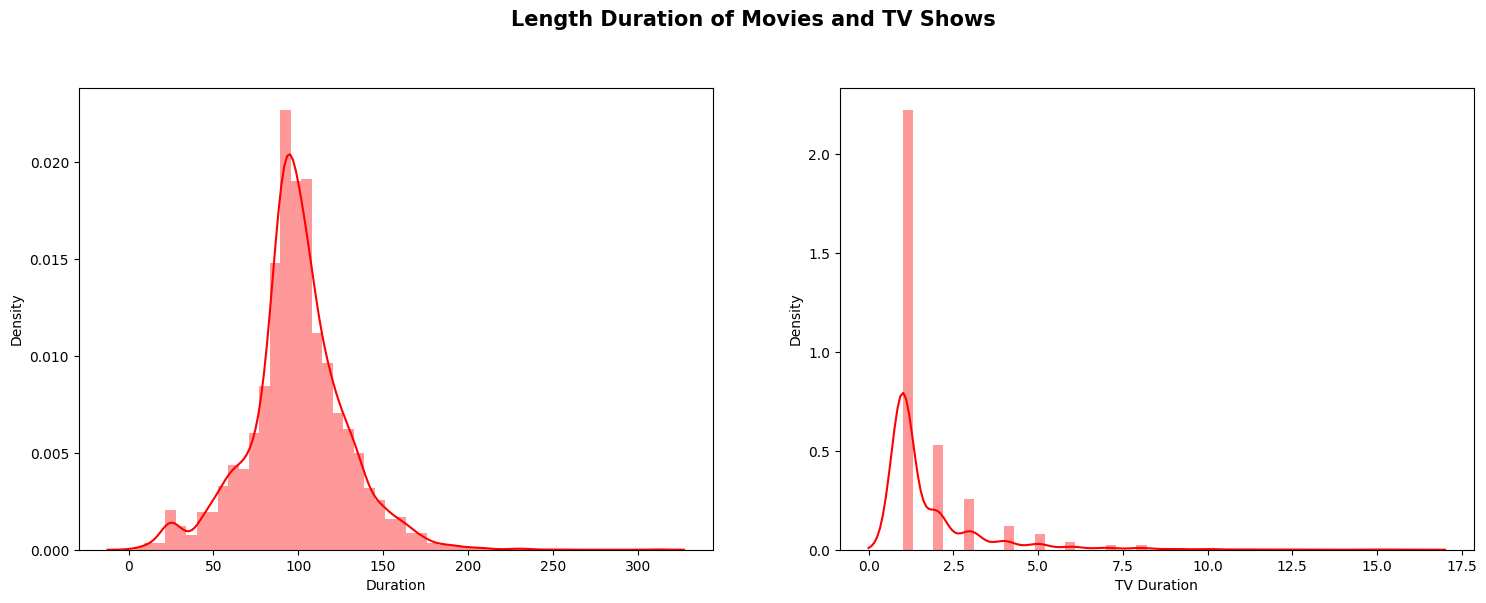

In [30]:
# Length distribution of Movies and TV Shows

fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Length Duration of Movies and TV Shows', weight='bold', size=15, y=1.01)

Movie_Data = Netflix_Data[Netflix_Data['Type']=='Movie']
sns.distplot(Movie_Data['Duration'],color="red", ax=ax[0])
plt.xlabel('Mivie Duration')

TV_Data = Netflix_Data[Netflix_Data['Type']=='TV Show']
sns.distplot(TV_Data['Duration'],color="red", ax=ax[1])
plt.xlabel('TV Duration')

plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Missing Data %
round(Netflix_Data.isna().sum()/len(Netflix_Data)*100, 2).sort_values(ascending=False)

Director              30.68
Cast                   9.22
Country                6.51
Netflix_Date_Added     0.13
Rating                 0.09
Show_ID                0.00
Type                   0.00
Title                  0.00
Release_Year           0.00
Duration               0.00
Genre                  0.00
Description            0.00
dtype: float64

In [32]:
# Handling Missing Values & Missing Value Imputation

Netflix_Data[['Director','Cast','Country']] = Netflix_Data[['Director','Cast','Country']].fillna(' ')
Netflix_Data.dropna(axis=0, inplace=True)

In [33]:
Netflix_Data.isna().sum()

Show_ID               0
Type                  0
Title                 0
Director              0
Cast                  0
Country               0
Netflix_Date_Added    0
Release_Year          0
Rating                0
Duration              0
Genre                 0
Description           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing values in the director, cast, and country attributes can be replaced with 'empty string'

Small amount of null value percentage present in rating and date_added column so if we drop these nan values it will not affect that much while building the model. So, we simply drop the nan value present in rating and date_added columns.

### 2. Handling Outliers

<Axes: >

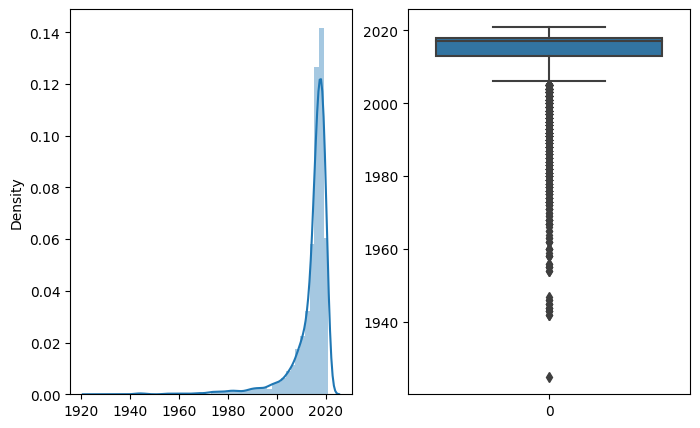

In [34]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(8,5))

# Display boxplot and dist plot.
sns.distplot(x=Netflix_Data['Release_Year'], ax=ax[0])
sns.boxplot(Netflix_Data.Release_Year)

In [35]:
''' Detection '''
# IQR METHOD
# Calculate the upper and lower limits
Q1 = Netflix_Data['Release_Year'].quantile(0.25)
Q3 = Netflix_Data['Release_Year'].quantile(0.75)
IQR = Q3 - Q1
lower_fence= Q1 - 1.5*IQR
upper_fence= Q3 + 1.5*IQR
print(f'Q1 : {Q1}')
print(f'Q3 : {Q3}')
print(f'IQR : {IQR}')
print(f'lower_fence : {lower_fence}')
print(f'upper_fence : {upper_fence}')

Q1 : 2013.0
Q3 : 2018.0
IQR : 5.0
lower_fence : 2005.5
upper_fence : 2025.5


##### What all outlier treatment techniques have you used and why did you use those techniques?

Since, the almost all of the data present in textual format except "Release_Year".

### ***The data that we need to create cluster/building model are present in textual format. So, there is no need to perform Handling Outlier.***

### 3. Feature Engineering of Genre

In [36]:
listed = Netflix_Data.copy()
listed['Genre'] = listed.Genre.apply(lambda row: row.split(', '))
listed.explode('Genre')['Genre'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [37]:
# Genres are extracted and re defined accordingly

replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance',
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality',
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family',
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy',
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [38]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []

  for word in (row['Genre']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))


Netflix_Data['Genres'] = listed.apply(lambda row: genre_replace(row),axis=1)
Netflix_Data['Genres'] = Netflix_Data['Genres'].apply(lambda row: row.split(', '))

Netflix_Data.explode('Genres')['Genres'].unique()

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

In [39]:
Netflix_Data['Genres']

0                 [Drama, SciFiFantasy]
1                               [Drama]
2                              [Horror]
3       [ActionAdventure, SciFiFantasy]
4                               [Drama]
                     ...               
7782                            [Drama]
7783                     [Drama, Music]
7784               [Documentary, Music]
7785                          [Reality]
7786               [Documentary, Music]
Name: Genres, Length: 7770, dtype: object

In [40]:
# Combinig Top Director, Genres, Cast in single attribute

def combine(row):
  text = ' '.join(row['Genres']).lower()
  if row['Cast'] != 'unknown':
    Cast_list = [actor.replace(' ', '') for actor in row['Cast'].split(', ')]
    if len(Cast_list) < 5:
      text = text + ' ' + ' '.join(Cast_list[:]).lower()
    else :
      text = text + ' ' + ' '.join(Cast_list[:5]).lower()
  if row['Director'] !='unknown':
    Director_list = ' '.join([Director.replace(' ', '') for Director in row['Director'].split(', ')])
    text = text + ' ' + Director_list.lower()
  return text

Netflix_Data['Combo_Data'] = Netflix_Data.apply(lambda row: combine(row), axis = 1)

Netflix_Data.head()['Combo_Data'].to_list()

['drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira ',
 'drama demiánbichir héctorbonilla oscarserrano azaliaortiz octaviomichel jorgemichelgrau',
 'horror teddchan stellachung henleyhii lawrencekoh tommykuan gilbertchan',
 'actionadventure scififantasy elijahwood johnc.reilly jenniferconnelly christopherplummer crispinglover shaneacker',
 'drama jimsturgess kevinspacey katebosworth aaronyoo lizalapira robertluketic']

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Removing Punctuations

In [41]:
# Remove Punctuations

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

Netflix_Data['Processed Description'] = Netflix_Data['Description'].apply(remove_punctuation)
Netflix_Data['Processed Combo_Data'] = Netflix_Data['Combo_Data'].apply(remove_punctuation)

In [42]:
Netflix_Data['Processed Description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 2. Converting into lower case

In [43]:
# Converting into lower case

Netflix_Data['Processed Description'] = Netflix_Data['Processed Description'].apply(lambda x: x.lower())

#### 3. Removing URLs & Removing words and digits contain digits.

In [44]:
# Remove URLs & Remove words and digits contain digits
def remove_digits(text):
  text = ''.join([i for i in text if not i.isdigit()])
  return ''.join(text)

Netflix_Data['Processed Description'] = Netflix_Data['Processed Description'].apply(remove_digits)
Netflix_Data['Processed Combo_Data'] = Netflix_Data['Processed Combo_Data'].apply(remove_digits)

#### 4. Tokenization

In [45]:
# Tokenization

def tokenizer(txt):
  tokens = word_tokenize(txt)

  return tokens
Netflix_Data['Processed Description'] = Netflix_Data['Processed Description'].apply(tokenizer)
Netflix_Data['Processed Combo_Data'] = Netflix_Data['Processed Combo_Data'].apply(tokenizer)

#### 5. Removing Stopwords & Removing White spaces

In [46]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [47]:
# Remove Stopwords

# function to remove stop words
def remove_stopwords(text):
    output= [word for word in text if word not in stopwords]
    return output

Netflix_Data['Processed Description'] = Netflix_Data['Processed Description'].apply(lambda x:remove_stopwords(x))

In [48]:
Netflix_Data['Processed Description'][0]

['future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 'saved',
 'squalor']

#### 6. Text Normalization

In [49]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

Netflix_Data['Processed Description'] = Netflix_Data['Processed Description'].apply(lambda x:lemmatize_verbs(x))

In [50]:
Netflix_Data['Processed Description']

0       [future, elite, inhabit, island, paradise, far...
1       [devastate, earthquake, hit, mexico, city, tra...
2       [army, recruit, find, dead, fellow, soldier, f...
3       [postapocalyptic, world, ragdoll, robots, hide...
4       [brilliant, group, students, become, cardcount...
                              ...                        
7782    [lebanons, civil, war, deprive, zozo, family, ...
7783    [scrappy, poor, boy, worm, way, tycoons, dysfu...
7784    [documentary, south, african, rapper, nasty, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentary, delve, mystique, behind, bluesro...
Name: Processed Description, Length: 7770, dtype: object

In [51]:
def joiner(text_list):
  new = []
  for text in text_list:
    if text == ' ' or text == '' :
      pass
    else:
      new.append(text)

  return ' '.join(new)

Netflix_Data['Processed Description'] = Netflix_Data['Processed Description'] .apply(lambda x : joiner(x))
Netflix_Data['Processed Combo_Data'] = Netflix_Data['Processed Combo_Data'].apply(lambda x : joiner(x))

In [52]:
Netflix_Data.loc[:,['Description', 'Processed Description', 'Combo_Data',	'Processed Combo_Data']].head(1).T

,0
Description,In a future where the elite inhabit an island ...
Processed Description,future elite inhabit island paradise far crowd...
Combo_Data,drama scififantasy joãomiguel biancacomparato ...
Processed Combo_Data,drama scififantasy joãomiguel biancacomparato ...


##### Which text normalization technique have you used and why?

Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

In computational linguistics, lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning. Unlike stemming, lemmatisation depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document. As a result, developing efficient lemmatisation algorithms is an open area of research.

#### 7. Text Vectorization

In [53]:
# Vectorizing Text

# Create a Vectorizer Object
vectorizer = CountVectorizer(min_df = 10, max_df = 0.5)
vector_Description = vectorizer.fit_transform(Netflix_Data['Processed Description'])
vector_Combo_Data = vectorizer.fit_transform(Netflix_Data['Processed Combo_Data'])

In [54]:
vector_Description.shape

(7770, 2096)

In [55]:
vector_Combo_Data.shape

(7770, 157)

##### Which text vectorization technique have you used and why?

CountVectorizer means breaking down a sentence or any text into words by performing preprocessing tasks like converting all words to lowercase, thus removing special characters. In NLP models can't understand textual data they only accept numbers, so this textual data needs to be vectorized.

#### 8. Dimesionality Reduction

In [56]:
# DImensionality Reduction (If needed)

# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(pd.concat([pd.DataFrame(vector_Description.todense()), pd.DataFrame(vector_Combo_Data.todense())],axis =1))

PCA(random_state=42)

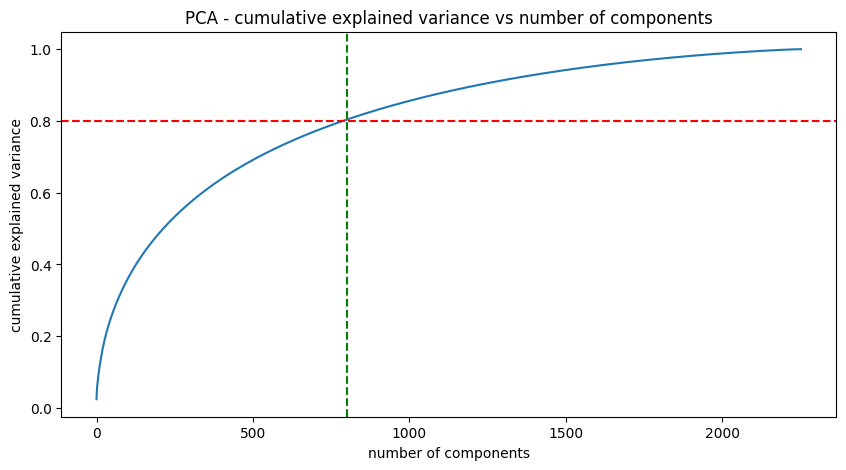

In [57]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 800, color='green', linestyle='--')
plt.show()

Vectorising the preprocessed attributes Combo_Data and Description has sum total of 2096 + 157 = 2253 dimensions. These dimensions will have to be reduced using PCA, which would result in loss of information. Alternatively, the two attributes can be used to model the content into topics using Latent Dirichlet Allocation. This would makes sure that all the topical information about video content are captured without putting any available information to waste.


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

***Principal component analysis***

Principal component analysis or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

#### 9. Preparing Dataset for Clustering

In [58]:
Netflix_Data_Clusters = Netflix_Data[['Type', 'Duration','Rating','Release_Year']]

In [59]:
# Encoding TV Shows and Movie ratings based on their age reccomendations guidelines

def topick(row):
  older_kids = ['TV-PG', 'PG', 'TV-Y7', 'TV-Y7-FV']
  kids = ['TV-G', 'G', 'TV-Y']
  teens = ['PG-13','TV-14']
  adult = ['R', 'NC-17', 'TV-MA', 'UR', 'NR']

  Rating = 'Others'
  for column in older_kids + kids + teens + adult:
    if row[column] == 1:
      if column in older_kids:
        Rating = 'Older Kids'
      elif column in kids :
        Rating = 'Kids'
      elif column in teens :
        Rating = 'Teens'
      elif column in adult:
        Rating = 'Adult'

  return Rating

Ratings = pd.get_dummies(Netflix_Data_Clusters['Rating']).apply(lambda x: topick(x),axis=1)

In [60]:
Netflix_Data_Clusters =  pd.concat([Netflix_Data_Clusters.drop(['Type','Rating'],axis =1),pd.get_dummies(Ratings), pd.get_dummies(Netflix_Data_Clusters['Type'])], axis =1)
Netflix_Data_Clusters

,Duration,Release_Year,Adult,Kids,Older Kids,Teens,Movie,TV Show
0,4,2020,1,0,0,0,0,1
1,93,2016,1,0,0,0,1,0
2,78,2011,1,0,0,0,1,0
3,80,2009,0,0,0,1,1,0
4,123,2008,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
7782,99,2005,1,0,0,0,1,0
7783,111,2015,0,0,0,1,1,0
7784,44,2019,1,0,0,0,1,0
7785,1,2019,0,0,1,0,0,1


In [61]:
#Extracting season numbers and movie duration as separate columns

def Duration(row,column):
  text = row['Duration']
  if column == 'show':
    if row['Movie'] == 0:
      return int(text)
    else:
      return 0
  if column == 'movie':
    if row['Movie'] ==1:
      return int(text)
    else:
      return 0
Netflix_Data_Clusters['Show_Duration'] = Netflix_Data_Clusters.apply(lambda x: Duration(x,'show'),axis =1)
Netflix_Data_Clusters['Movie_Duration'] = Netflix_Data_Clusters.apply(lambda x: Duration(x,'movie'), axis=1)

In [62]:
# Binng release year based on decades

def bin_release_year(row):
  r_year = row['Release_Year']
  for yr in np.arange(2030,1910,-10):
    if r_year >= yr:
      return (yr)

Netflix_Data_Clusters['Release_Year_Bins'] = (Netflix_Data_Clusters.apply(lambda x: bin_release_year(x), axis=1))

In [63]:
Netflix_Data_Clusters.drop('Duration', axis = 1, inplace=True)
Netflix_Data_Clusters

,Release_Year,Adult,Kids,Older Kids,Teens,Movie,TV Show,Show_Duration,Movie_Duration,Release_Year_Bins
0,2020,1,0,0,0,0,1,4,0,2020
1,2016,1,0,0,0,1,0,0,93,2010
2,2011,1,0,0,0,1,0,0,78,2010
3,2009,0,0,0,1,1,0,0,80,2000
4,2008,0,0,0,1,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...,...
7782,2005,1,0,0,0,1,0,0,99,2000
7783,2015,0,0,0,1,1,0,0,111,2010
7784,2019,1,0,0,0,1,0,0,44,2010
7785,2019,0,0,1,0,0,1,1,0,2010


#### ***Topic Modelling using GENSIM***

***Topic modeling*** is technique to extract the hidden topics from large volumes of text. Topic model is a probabilistic model which contain information about the text.

Ex: If it is a news paper corpus it may have topics like economics, sports, politics, weather.

Topic models are useful for purpose of document clustering, organizing large blocks of textual data, information retrieval from unstructured text and feature selection. Finding good topics depends on the quality of text processing , the choice of the topic modeling algorithm, the number of topics specified in the algorithm.

***Latent Dirichlet Allocation (LDA)*** is a popular topic modeling technique to extract topics from a given corpus. The term latent conveys something that exists but is not yet developed. In other words, latent means hidden or concealed.

*While sklearn only supports multicore processing gensim enables the user to employ GPUs even on distributed systems. It has to be mentioned that sklearn seems to have a pretty good algorithm for convergence while gensim needs to be optimised and regulated properly.*

In [64]:
topic_input = Netflix_Data['Processed Description'] + ' ' + Netflix_Data['Processed Combo_Data']

In [65]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

gensim_paragraphs = (topic_input).apply(lambda row: row.split(' '))

# dictionary of corpus
dict_gensim_para = Dictionary(gensim_paragraphs)
dict_gensim_para.filter_extremes(no_below = 5, no_above = 0.6)

#creating corpus
bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs]

In [66]:
from gensim.models import TfidfModel
tfidf_gensim_para = TfidfModel(bow_gensim_para)
vectors_gensim_para = tfidf_gensim_para[bow_gensim_para]

lda_para_model_n = []
for n in (range(5, 16)):
  lda_model = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=1000, eta='auto', iterations=400,
                            num_topics=n, passes=20, eval_every=None,
                            random_state=42)

  lda_coherence = CoherenceModel(model=lda_model, texts=gensim_paragraphs,
                            dictionary=dict_gensim_para, coherence='c_npmi')

  print(n,'|', lda_coherence.get_coherence())
  lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

5 | -0.005373851576749363
6 | -0.047545700907165984
7 | -0.012128771622489326
8 | -0.016213783740722586
9 | 0.0029633402726698273
10 | -0.02150544023999084
11 | -0.025837543982099687
12 | -0.029748975659478635
13 | -0.03162352661862352
14 | -0.0648752247240984
15 | -0.03421938302593942


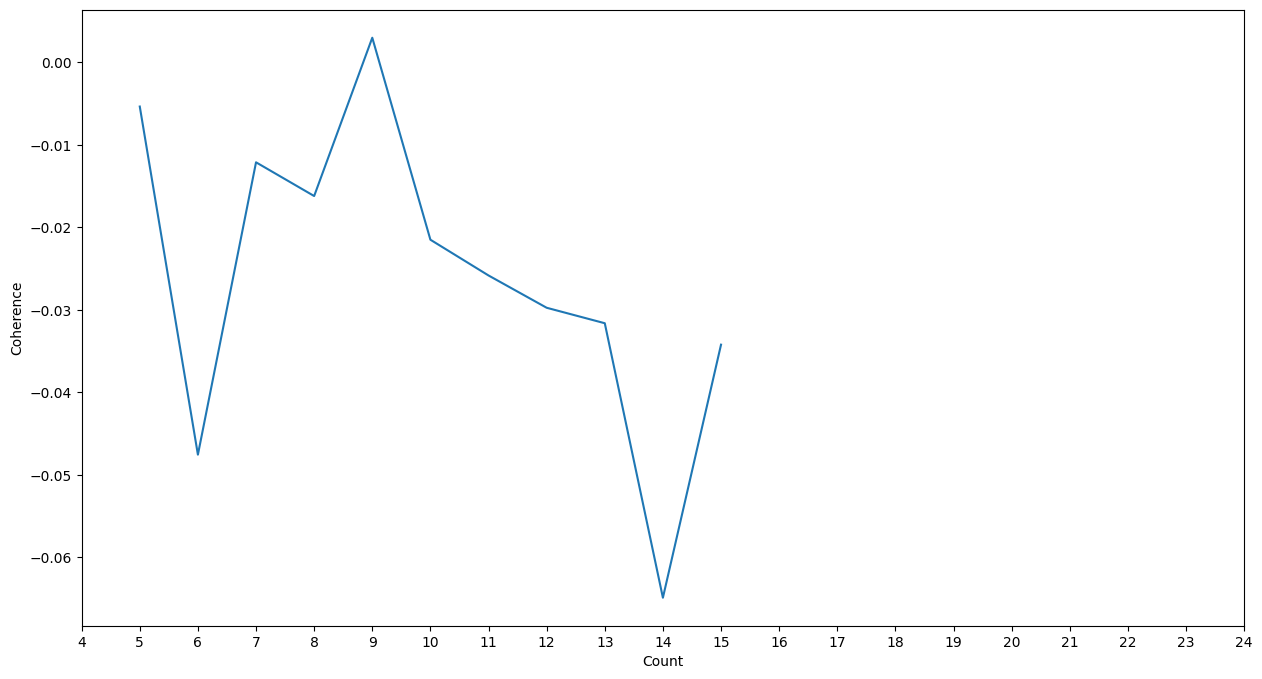

In [67]:
lda_df = pd.DataFrame(lda_para_model_n, columns=["Count", "model", "Coherence"]).set_index("Count")[["Coherence"]]
plt.figure(figsize=(15,8))
_ = sns.lineplot(x='Count', y='Coherence', data=lda_df )
_ = plt.xticks(ticks = np.arange(4,25,1))

In [68]:
lda_df = lda_df.reset_index()
topic_nums = lda_df[lda_df['Coherence']==lda_df['Coherence'].max()]['Count'].to_list()[0]
topic_nums

9

In [69]:
lda_gensim_para = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=2000, eta='auto', iterations=400,
                            num_topics= topic_nums , passes=20, eval_every=None,
                            random_state=42)

#function to display gensim topics
def display_gensim_topics(model):
  gen_list = lda_gensim_para.print_topics()
  for i in range(0,len(gen_list)):
    print('Topic: ',i+1,'\n')
    topics = gen_list[i][1]
    for j in topics.split('+'):
      print(j.split('"')[1])

    print("------\n")

display_gensim_topics(lda_gensim_para)

Topic:  1 

comedy
family
kids
friends
–
adventure
new
help
learn
get
------

Topic:  2 

comedy
family
school
–
high
get
new
teen
kids
reality
------

Topic:  3 

crime
drama
murder
actionadventure
thriller
police
detective
cop
case
killer
------

Topic:  4 

comedy
reality
series
documentary
life
stories
show
take
live
comedian
------

Topic:  5 

drama
romance
comedy
life
love
find
man
woman
young
–
------

Topic:  6 

actionadventure
drama
thriller
horror
scififantasy
force
anime
young
must
crime
------

Topic:  7 

comedy
horror
standup
new
special
hes
return
take
past
family
------

Topic:  8 

documentary
music
sports
explore
world
science
life
rise
history
film
------

Topic:  9 

drama
romance
comedy
young
love
two
friends
woman
three
find
------



In [70]:
pip install pyldavis==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136170 sha256=93bae508ff378c7cfbfa2fdc87fe5c82bb5c858c3f2ac347f59869b0f4df37a3
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [71]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [72]:
p = pyLDAvis.gensim.prepare(lda_gensim_para, bow_gensim_para, dict_gensim_para)

p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.096858 -0.139994       1        1  15.876567
8     -0.112385 -0.086339       2        1  14.000574
5     -0.177206  0.117202       3        1  13.473005
0     -0.030020 -0.117826       4        1  11.707209
7      0.196044  0.166418       5        1  10.467952
3      0.240970  0.024999       6        1   9.971432
1     -0.004374 -0.110249       7        1   9.217246
2     -0.146013  0.232340       8        1   8.093448
6      0.129842 -0.086550       9        1   7.192567, topic_info=                Term         Freq        Total Category  logprob  loglift
163      documentary  1411.000000  1411.000000  Default  30.0000  30.0000
232           comedy  2396.000000  2396.000000  Default  29.0000  29.0000
2              drama  2835.000000  2835.000000  Default  28.0000  28.0000
152            crime   549.000000   549.000000  Default  27.0000  27.0000
216          romance   944.000000   944.000000  Default  26.0000  26.0000
..               ...          ...          ...      ...      ...      ...
36              find    35.801832   621.322976   Topic9  -5.4184  -0.2217
48   actionadventure    36.771244   832.466987   Topic9  -5.3917  -0.4876
262                –    32.604357   569.821726   Topic9  -5.5120  -0.2288
180             star    27.669121   179.560806   Topic9  -5.6761   0.7619
371            years    27.474308   231.788565   Topic9  -5.6832   0.4995

[671 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
883       2  0.906518        aamirkhan
2005      1  0.880526        abhaydeol
3541      3  0.917131        abilities
48        1  0.020421  actionadventure
48        3  0.651077  actionadventure
...     ...       ...              ...
399       6  0.008147                ’
399       7  0.051596                ’
399       8  0.192805                ’
668       4  0.980674                “
669       4  0.948963                ”

[1373 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 6, 1, 8, 4, 2, 3, 7])

In [73]:
lda = {}
for i in range(0,lda_gensim_para.num_topics):
  lda[f'Topic {i}'] = np.zeros(Netflix_Data.shape[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
for i, row in enumerate(lda_gensim_para[bow_gensim_para]):
  for topic in row:
    lda[f'Topic {topic[0]}'][i] = topic[1]

Topic_Model_Data = pd.DataFrame(lda)
Topic_Model_Data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,0.000000,0.000000,0.000000,0.170027,0.0,0.781320,0.000000,0.000000,0.000000
1,0.309491,0.000000,0.142862,0.510571,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.492203,0.466816,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.456764,0.0,0.497419,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.186201,0.0,0.761885,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
7765,0.925860,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7766,0.000000,0.000000,0.297370,0.000000,0.0,0.000000,0.000000,0.000000,0.656848
7767,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.189383,0.761987,0.000000
7768,0.355053,0.221696,0.196083,0.180842,0.0,0.000000,0.000000,0.000000,0.000000


In [75]:
def topic_input(row):
  highest = 0
  top = 'None'
  for topic in Topic_Model_Data.columns:
    if row[topic] > highest:
      highest = row[topic]
      top = f'Topic {int(topic[-1])+1}'
  return top

topic = Topic_Model_Data.apply(lambda x:topic_input(x),axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
Netflix_Data_Clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Release_Year,Adult,Kids,Older Kids,Teens,Movie,TV Show,Show_Duration,Movie_Duration,Release_Year_Bins
0,2020,1,0,0,0,0,1,4,0,2020
1,2016,1,0,0,0,1,0,0,93,2010
2,2011,1,0,0,0,1,0,0,78,2010
3,2009,0,0,0,1,1,0,0,80,2000
4,2008,0,0,0,1,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...,...
7782,2005,1,0,0,0,1,0,0,99,2000
7783,2015,0,0,0,1,1,0,0,111,2010
7784,2019,1,0,0,0,1,0,0,44,2010
7785,2019,0,0,1,0,0,1,1,0,2010


#### 10. Data Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

Netflix_Data_Clusters = Netflix_Data_Clusters.drop('Release_Year', axis=1)

scaler = StandardScaler()
X_rescale = scaler.fit_transform(Netflix_Data_Clusters)

#dataset contains degree of belonging of document to each topic concatenated to scaled Dataframe
X = pd.concat([pd.DataFrame(X_rescale, columns = Netflix_Data_Clusters.columns ), (Topic_Model_Data)], axis=1)
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adult,Kids,Older Kids,Teens,Movie,TV Show,Show_Duration,Movie_Duration,Release_Year_Bins,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,1.071536,-0.265599,-0.453828,-0.651245,-1.496730,1.496730,2.906811,-1.329626,1.290270,0.000000,0.000000,0.000000,0.170027,0.0,0.781320,0.000000,0.000000,0.000000
1,1.071536,-0.265599,-0.453828,-0.651245,0.668123,-0.668123,-0.457193,0.470966,0.167605,0.309491,0.000000,0.142862,0.510571,0.0,0.000000,0.000000,0.000000,0.000000
2,1.071536,-0.265599,-0.453828,-0.651245,0.668123,-0.668123,-0.457193,0.180548,0.167605,0.000000,0.000000,0.000000,0.000000,0.0,0.492203,0.466816,0.000000,0.000000
3,-0.933240,-0.265599,-0.453828,1.535520,0.668123,-0.668123,-0.457193,0.219270,-0.955060,0.000000,0.000000,0.000000,0.456764,0.0,0.497419,0.000000,0.000000,0.000000
4,-0.933240,-0.265599,-0.453828,1.535520,0.668123,-0.668123,-0.457193,1.051802,-0.955060,0.000000,0.000000,0.000000,0.186201,0.0,0.761885,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,1.071536,-0.265599,-0.453828,-0.651245,0.668123,-0.668123,-0.457193,0.587133,-0.955060,0.925860,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7766,-0.933240,-0.265599,-0.453828,1.535520,0.668123,-0.668123,-0.457193,0.819467,0.167605,0.000000,0.000000,0.297370,0.000000,0.0,0.000000,0.000000,0.000000,0.656848
7767,1.071536,-0.265599,-0.453828,-0.651245,0.668123,-0.668123,-0.457193,-0.477733,0.167605,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.189383,0.761987,0.000000
7768,-0.933240,-0.265599,2.203477,-0.651245,-1.496730,1.496730,0.383808,-1.329626,0.167605,0.355053,0.221696,0.196083,0.180842,0.0,0.000000,0.000000,0.000000,0.000000


## ***6. ML Model Implementation***

In [78]:
Cluster_Report = {'Algorithm':[], 'Parameters':[], 'Clusters':[], 'Silhouette Coefficient':[], 'Davies-Bouldin Index': [], 'Calinski-Harabasz Score': []}

def update_report(algo_name, details, clusters, sil_score, db_index, ch_score):
  data = [algo_name, details, clusters, sil_score, db_index, ch_score]
  for i,detail in enumerate(Cluster_Report):
    Cluster_Report[detail].append(data[i])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ***ML Model - 1***

###***K-Means Clustering*** ->

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

A silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect. The silhouette plots can be used to select the most optimal value of the K

In [79]:
silhouette_score_ = [ ]
sum_of_sq_dist = {}
range_n_clusters = [i for i in range(2,20)]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10,random_state=10)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    sum_of_sq_dist[n_clusters] = clusterer.inertia_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
Kmeans = pd.DataFrame(silhouette_score_ , columns = ["No of Clusters" , "Silhouette Score"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Clusters vs Silhouette score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


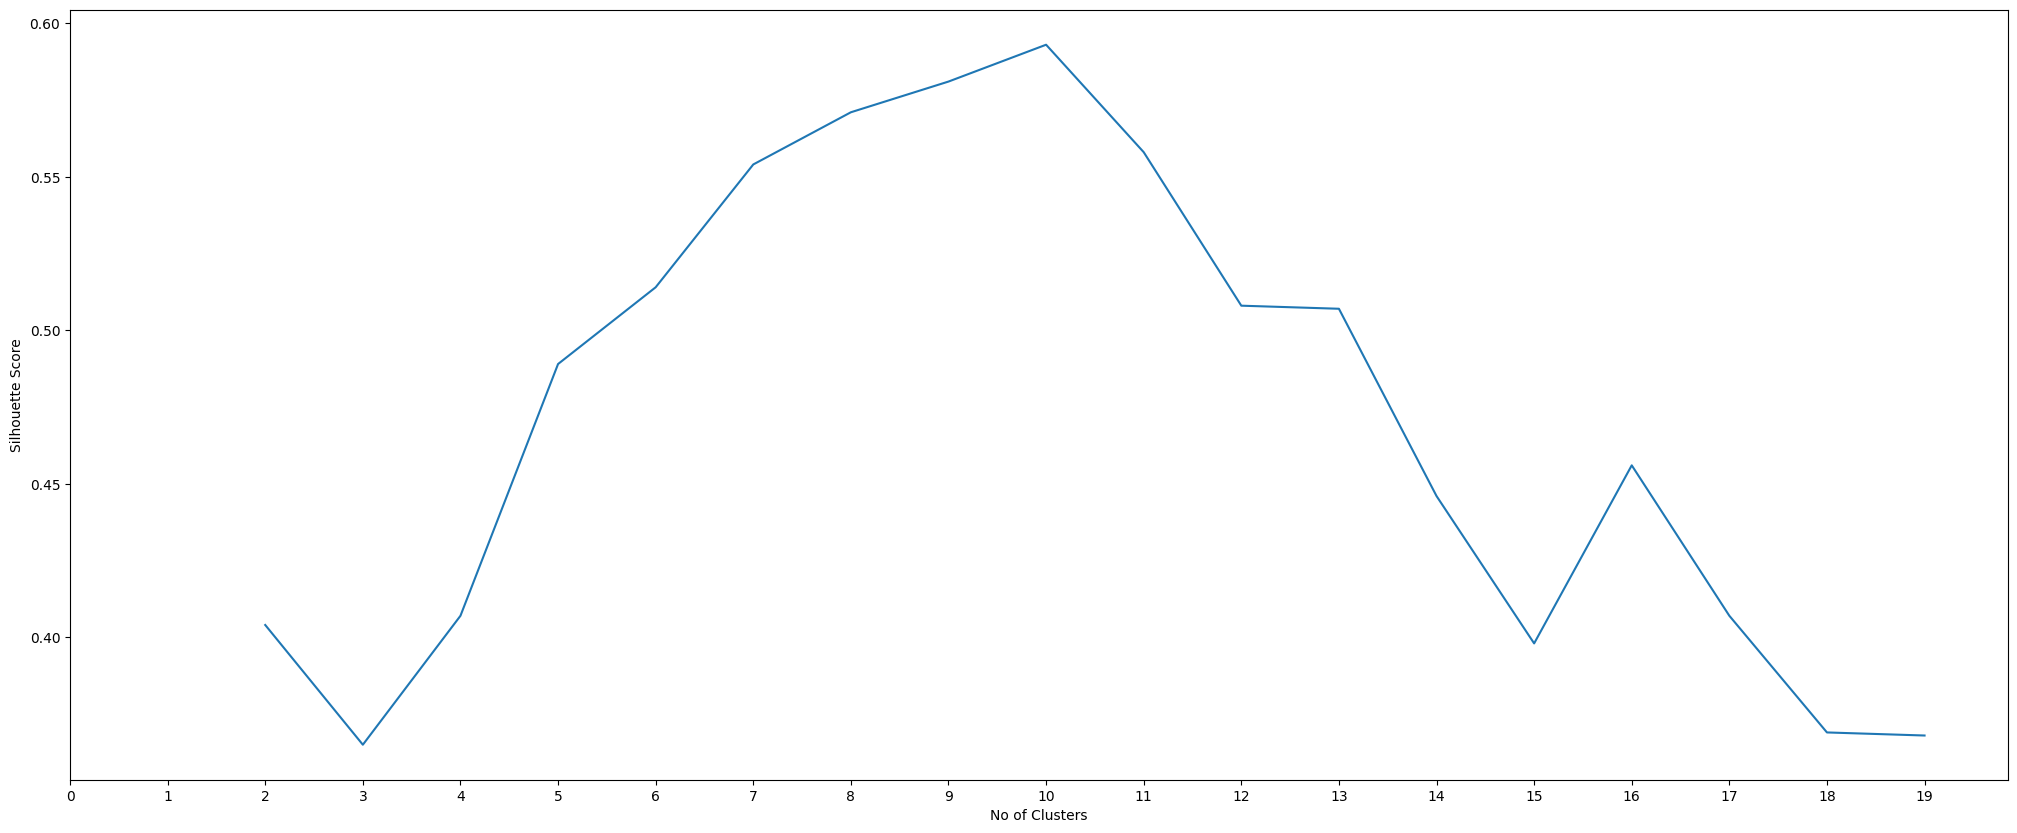

In [81]:
plt.figure(figsize=(25,10))
_ = sns.lineplot(x = Kmeans['No of Clusters'], y = Kmeans['Silhouette Score'])
_ = plt.xticks(ticks = np.arange(0,20,1))

In [82]:
Kmeans.sort_values(['Silhouette Score','No of Clusters'],ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No of Clusters,Silhouette Score
8,10,0.593
7,9,0.581
6,8,0.571
9,11,0.558
5,7,0.554


### Using Elbow Method to determine the Optimal number of Clusters

In [83]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,20):
    km=KMeans(n_clusters=i,random_state = 42)
    km.fit(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


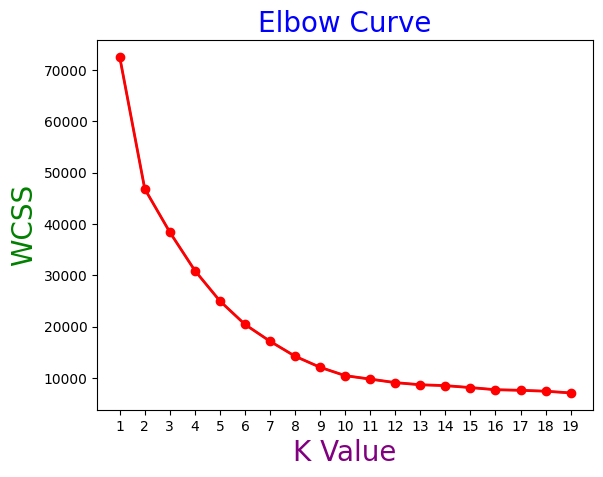

In [84]:
#elbow curve
plt.plot(range(1,20),wcss)
plt.plot(range(1,20),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,20,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

### Displaying Silhouette plot for K means Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For n_clusters = 2 The average silhouette_score is : 0.40442157084626007
For n_clusters = 3 The average silhouette_score is : 0.4322466878644485
For n_clusters = 4 The average silhouette_score is : 0.4074178112582351
For n_clusters = 5 The average silhouette_score is : 0.41619792727470645
For n_clusters = 6 The average silhouette_score is : 0.44837428338003904
For n_clusters = 7 The average silhouette_score is : 0.5541252187538742
For n_clusters = 8 The average silhouette_score is : 0.566171761414172
For n_clusters = 9 The average silhouette_score is : 0.5831273730092879
For n_clusters = 10 The average silhouette_score is : 0.5932817472040234
For n_clusters = 11 The average silhouette_score is : 0.5790434497336276
For n_clusters = 12 The average silhouette_score is : 0.5229483016317313
For n_clusters = 13 The average silhouette_score is : 0.5018867029500185
For n_clusters = 14 The average silhouette_score is : 0.41145874076511185
For n_clusters = 15 The average silhouette_score is : 0.

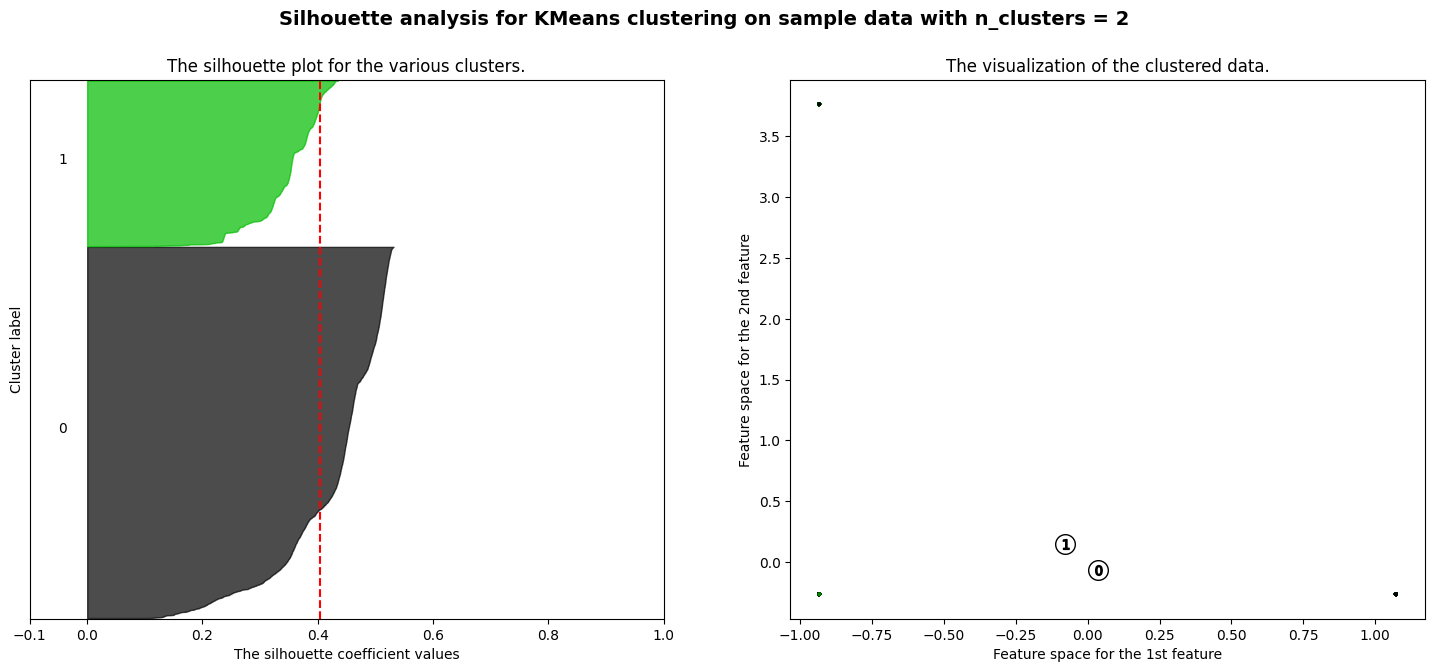

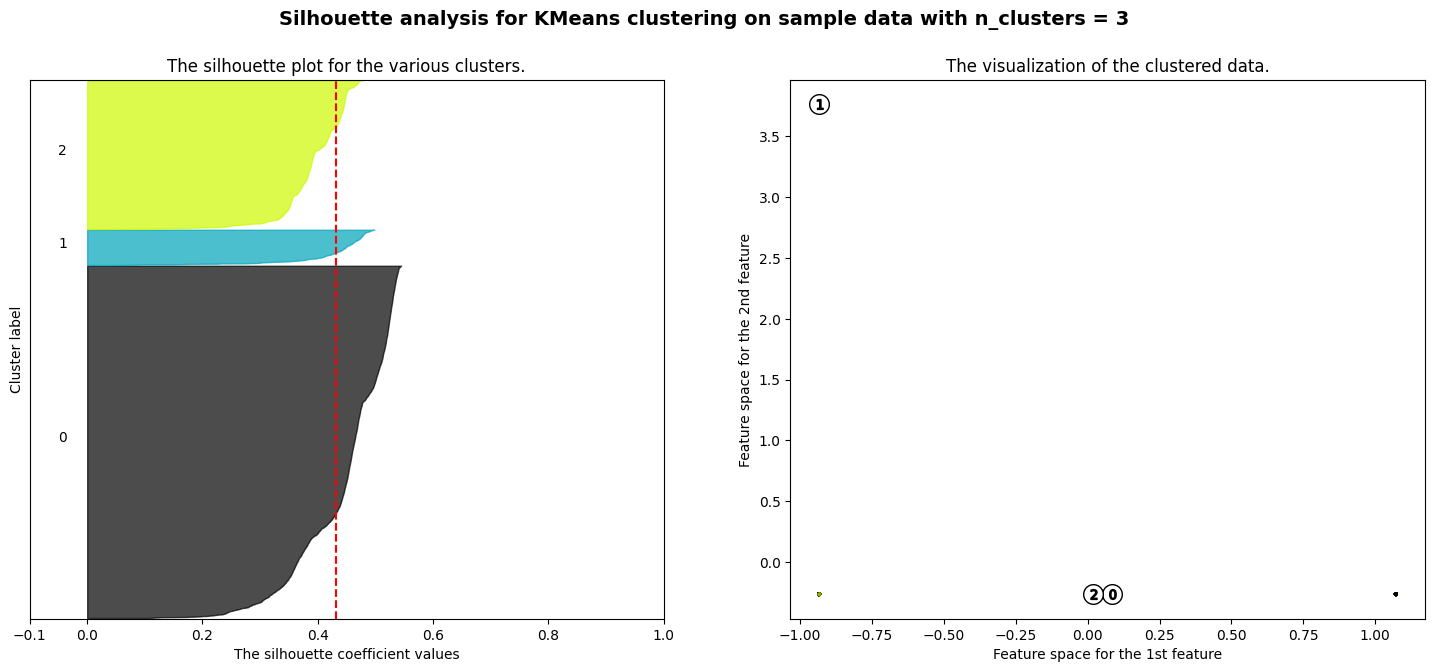

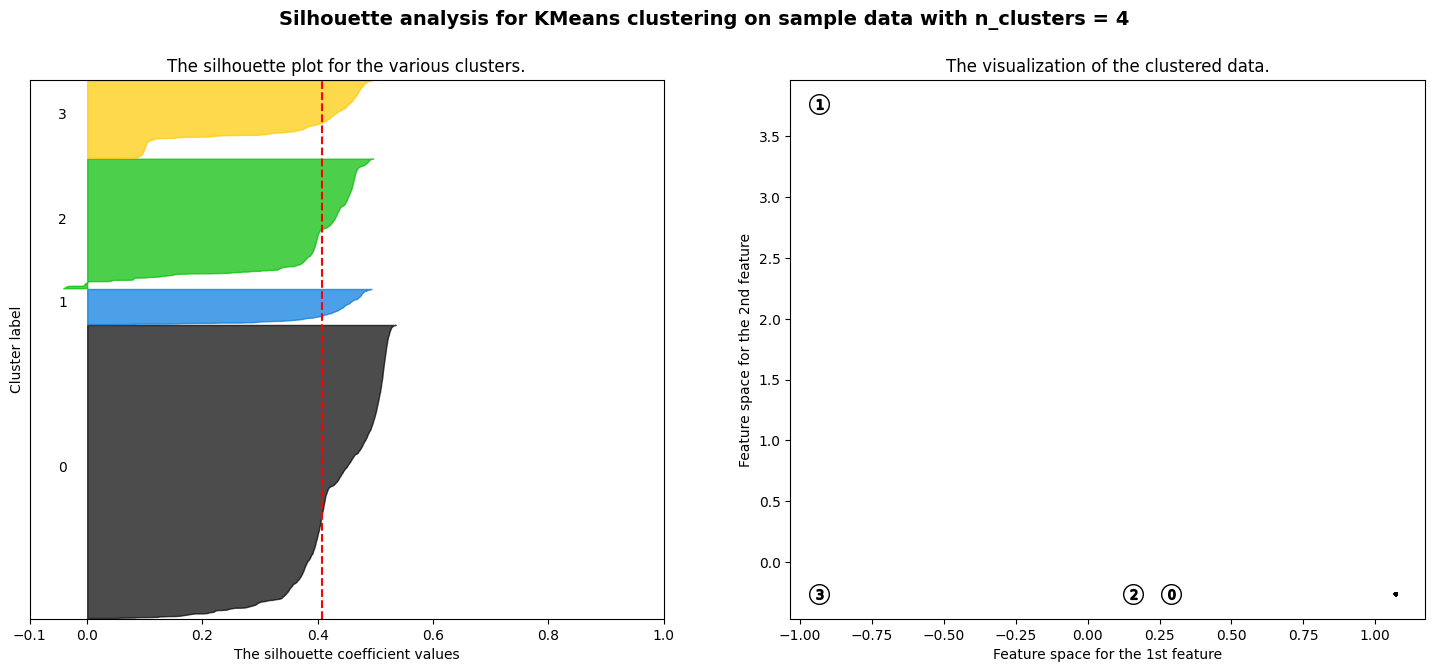

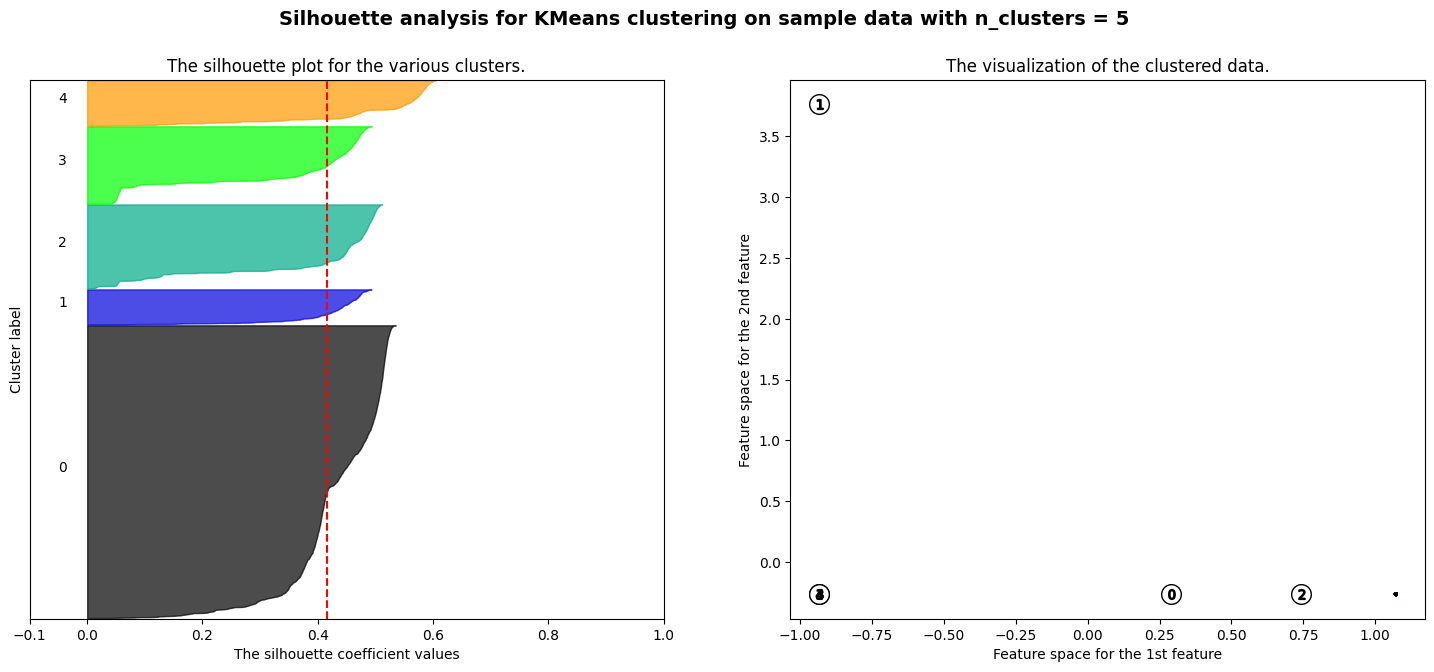

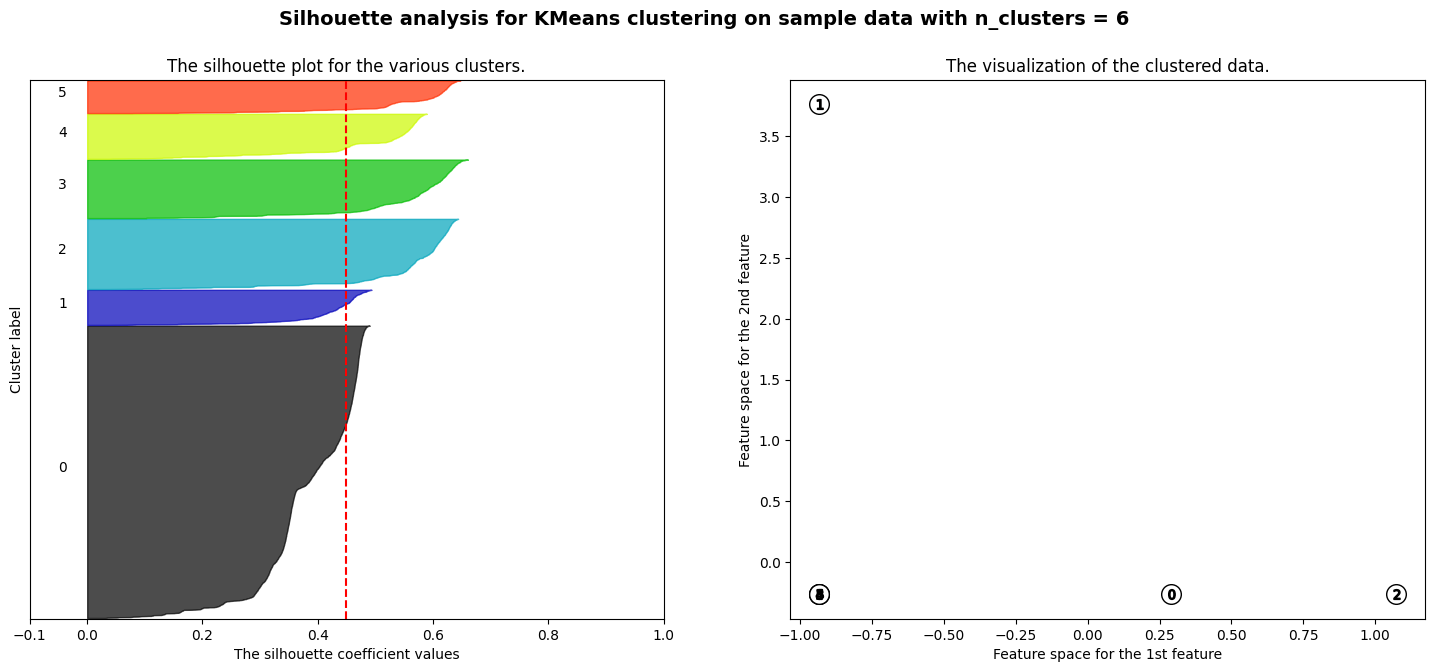

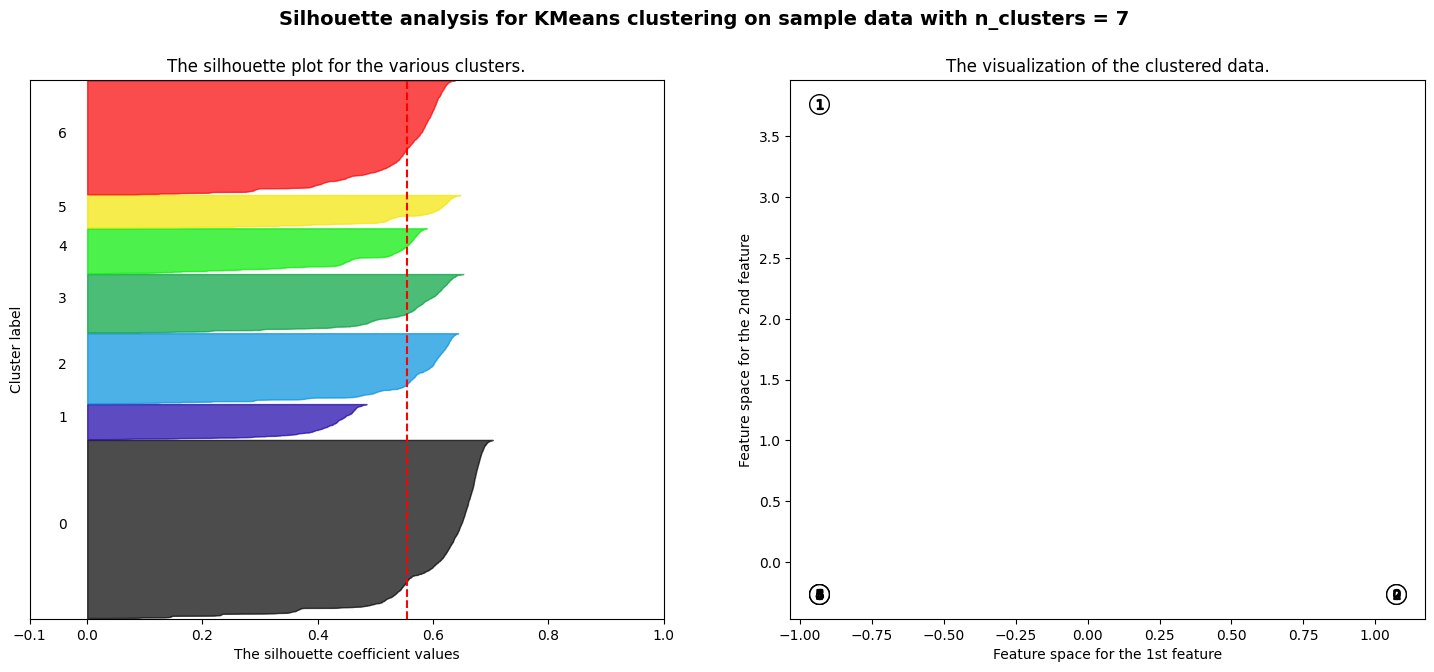

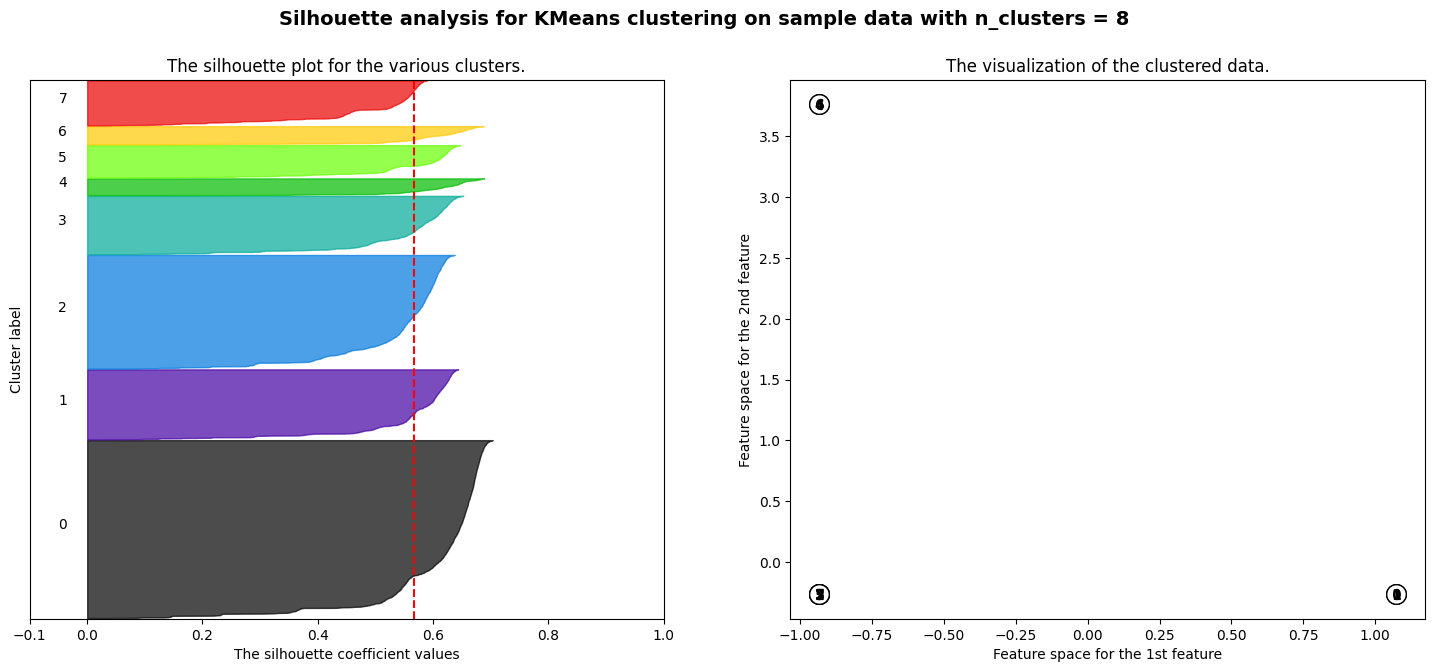

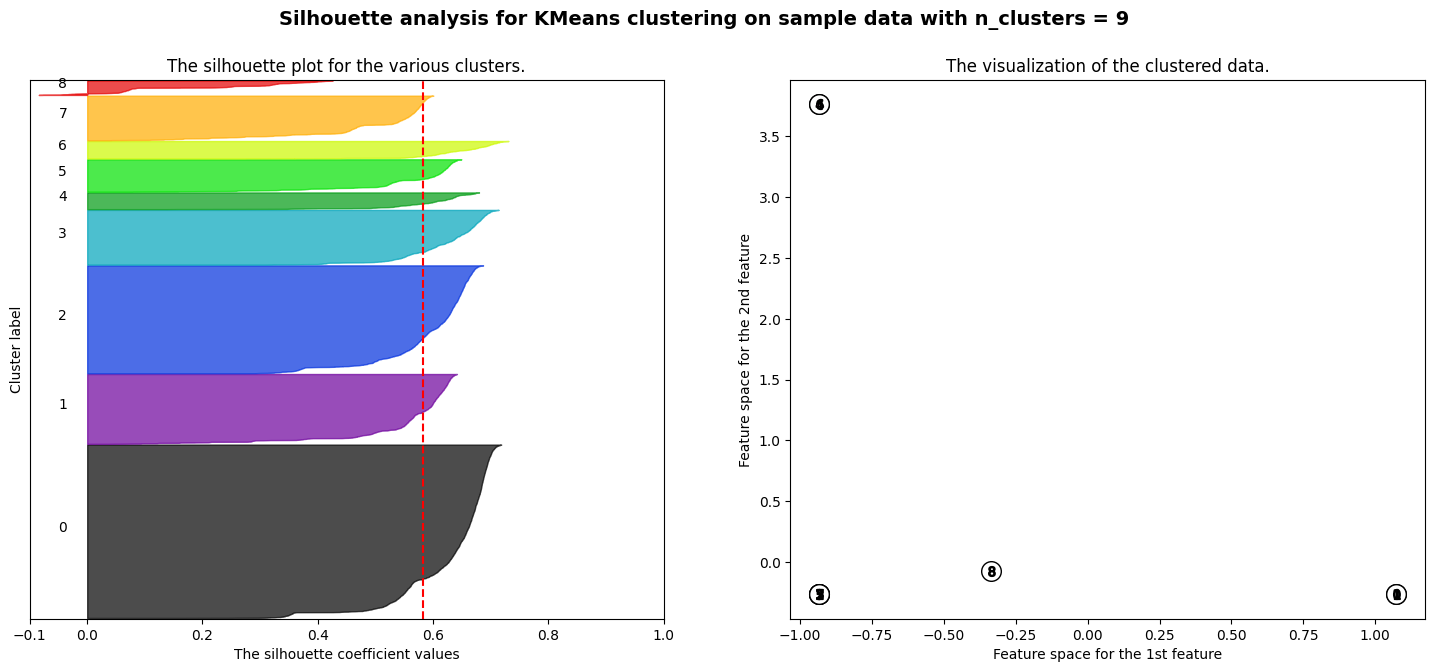

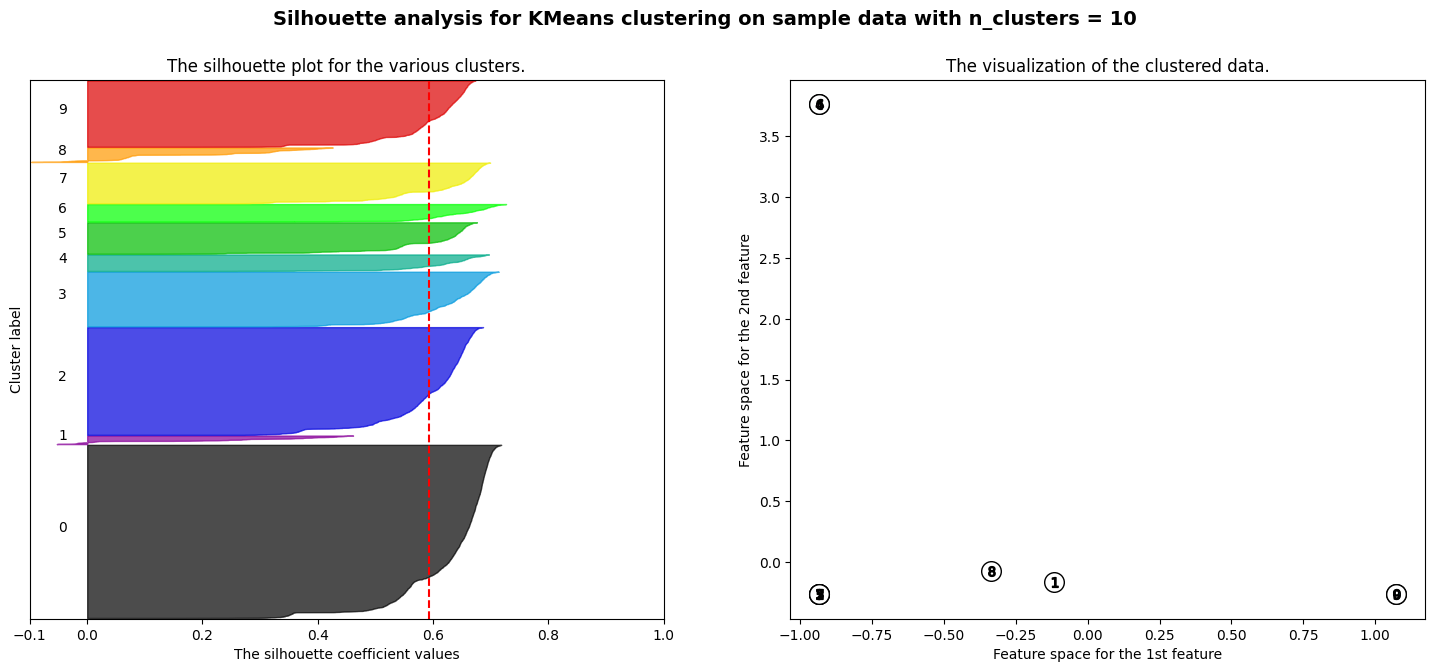

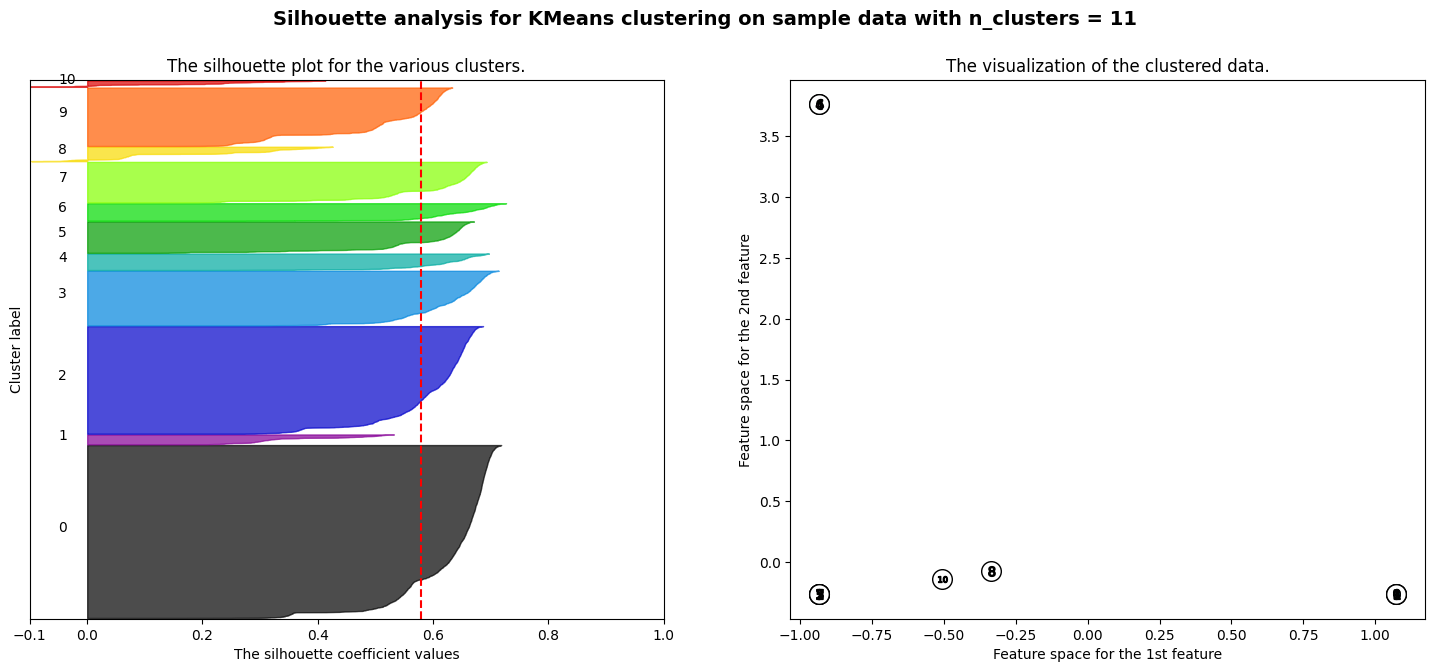

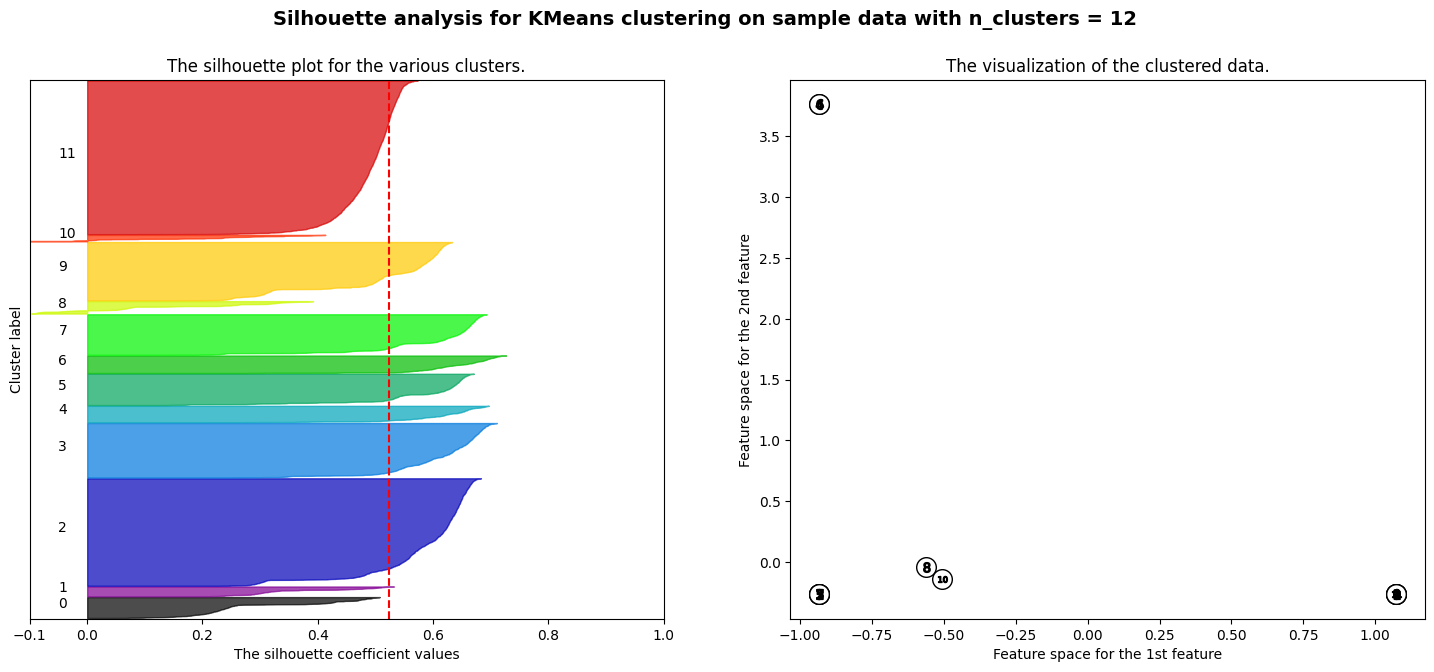

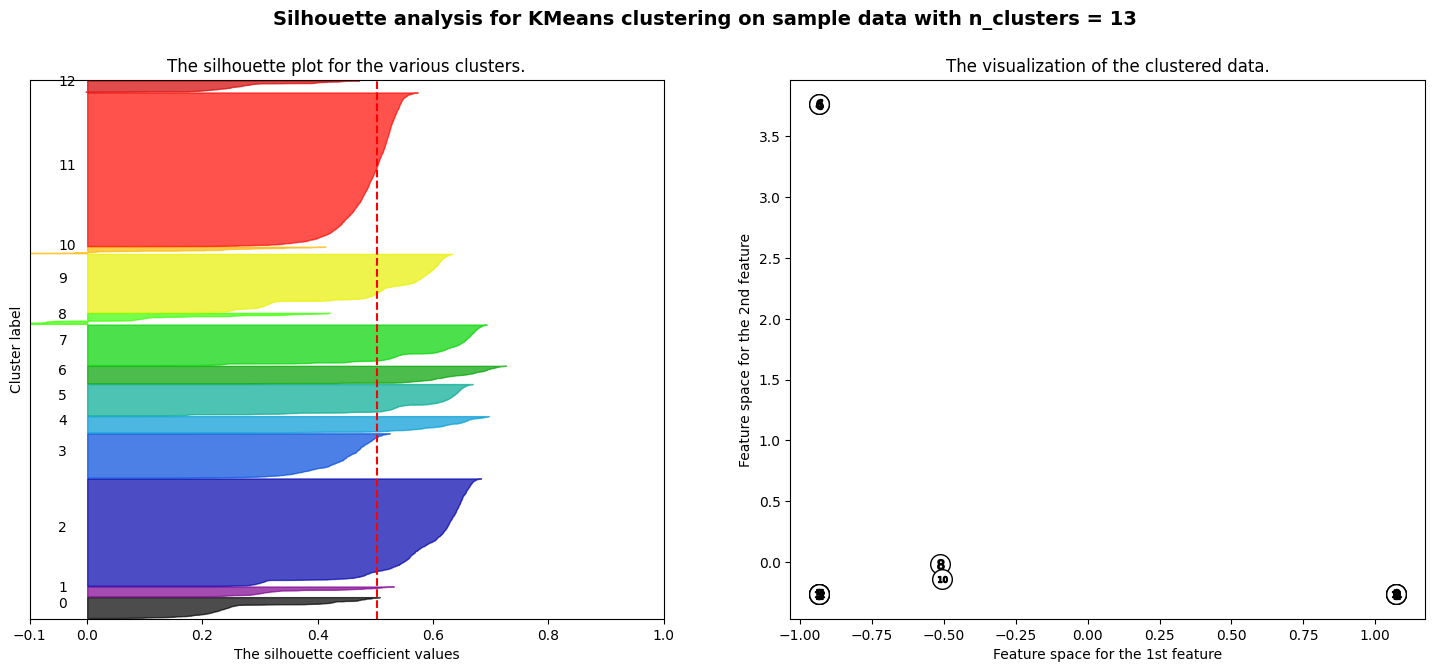

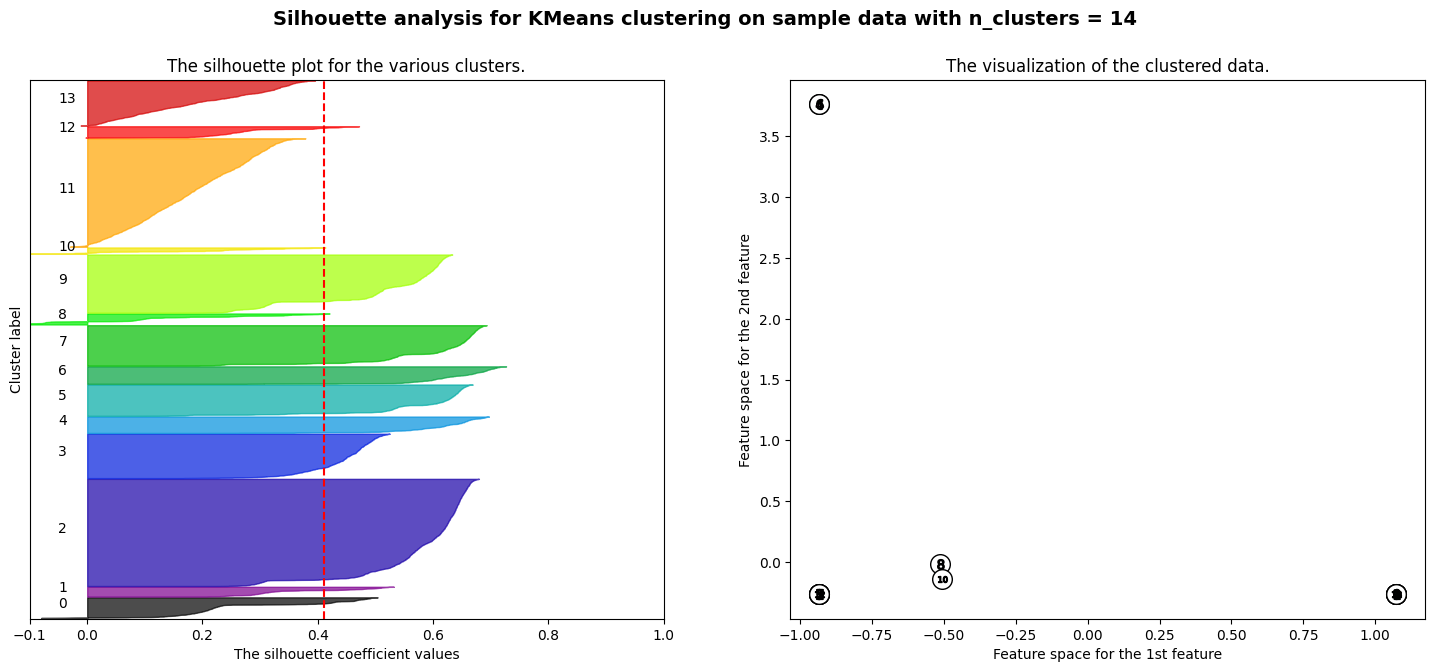

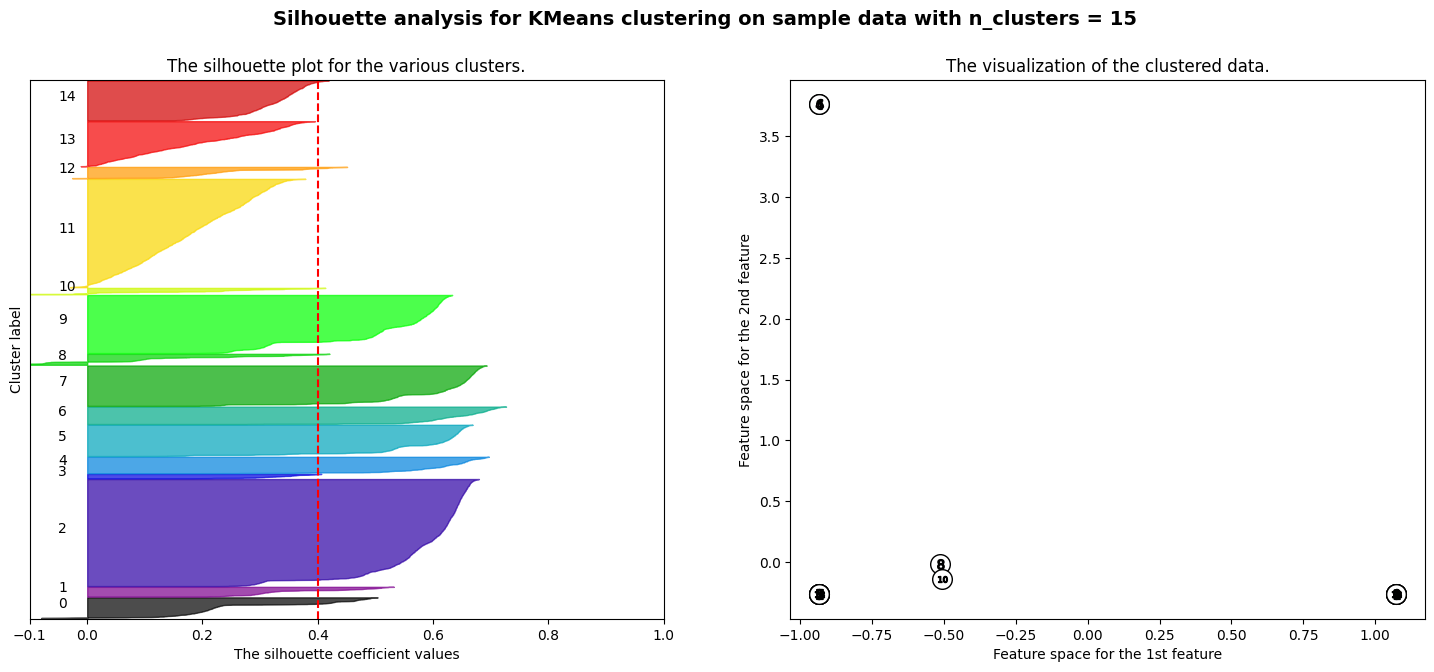

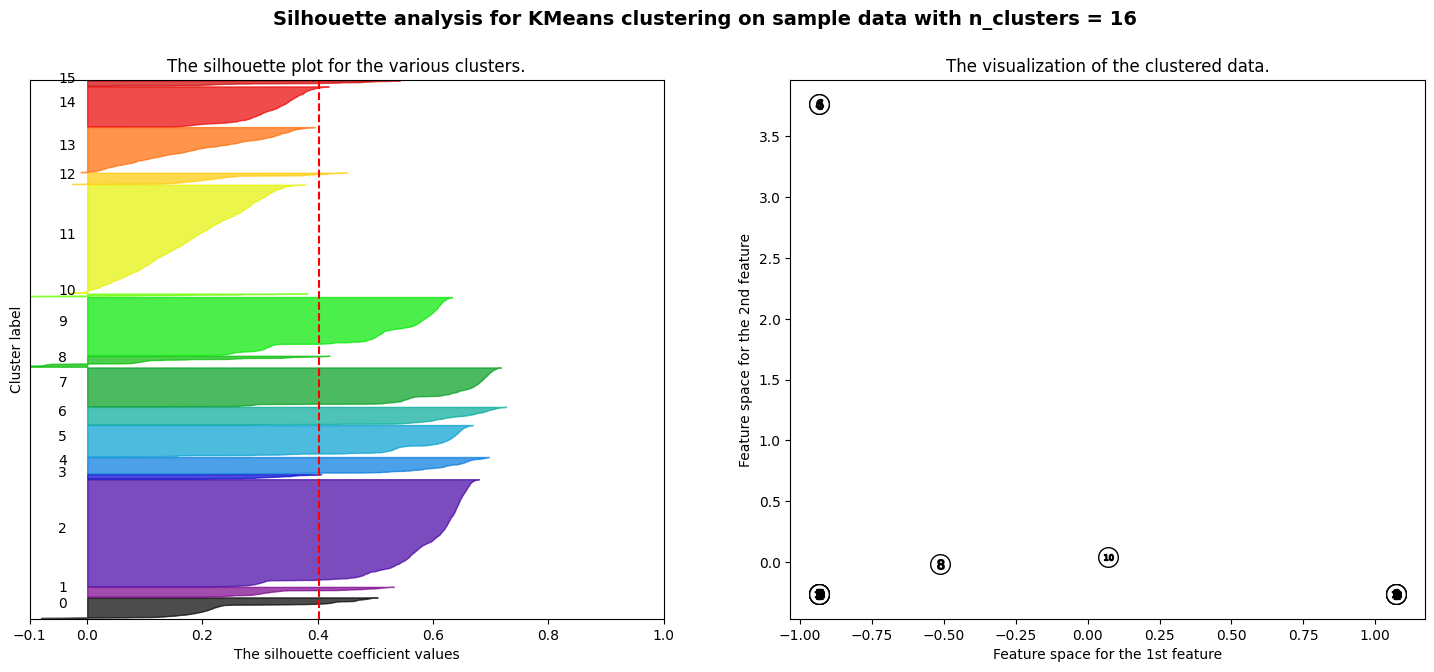

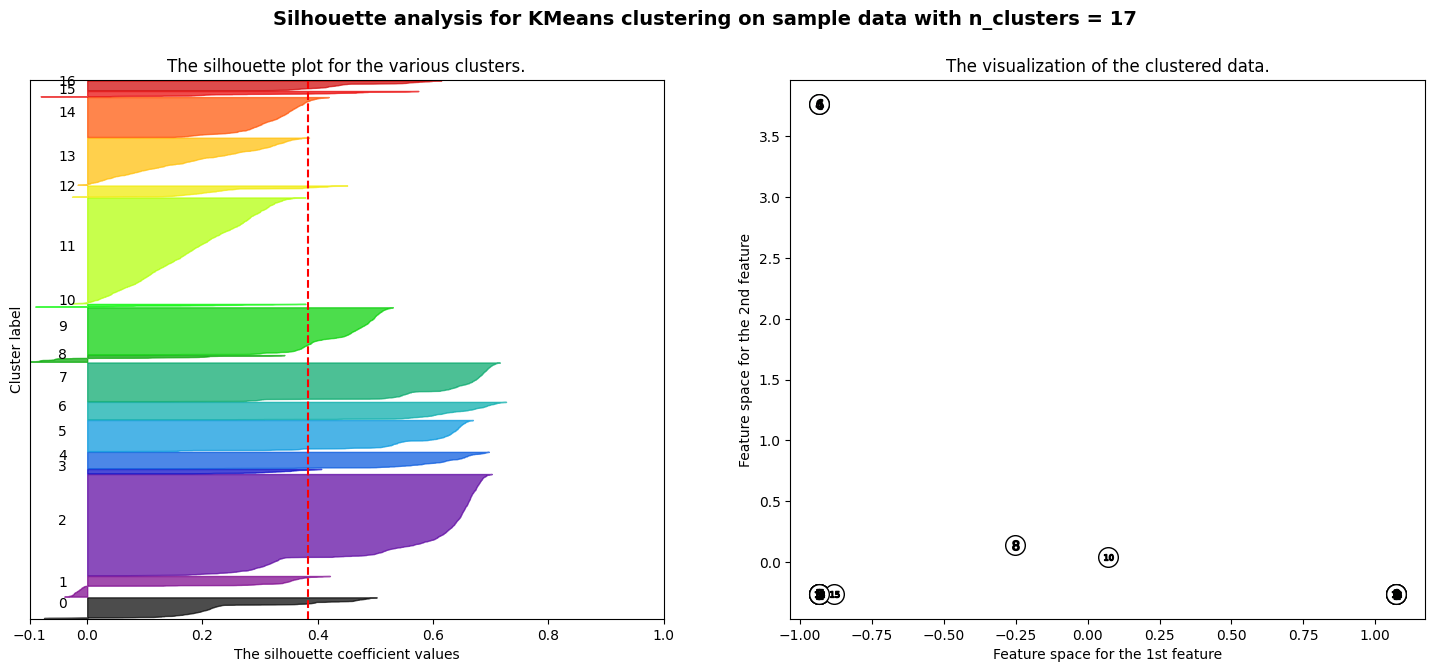

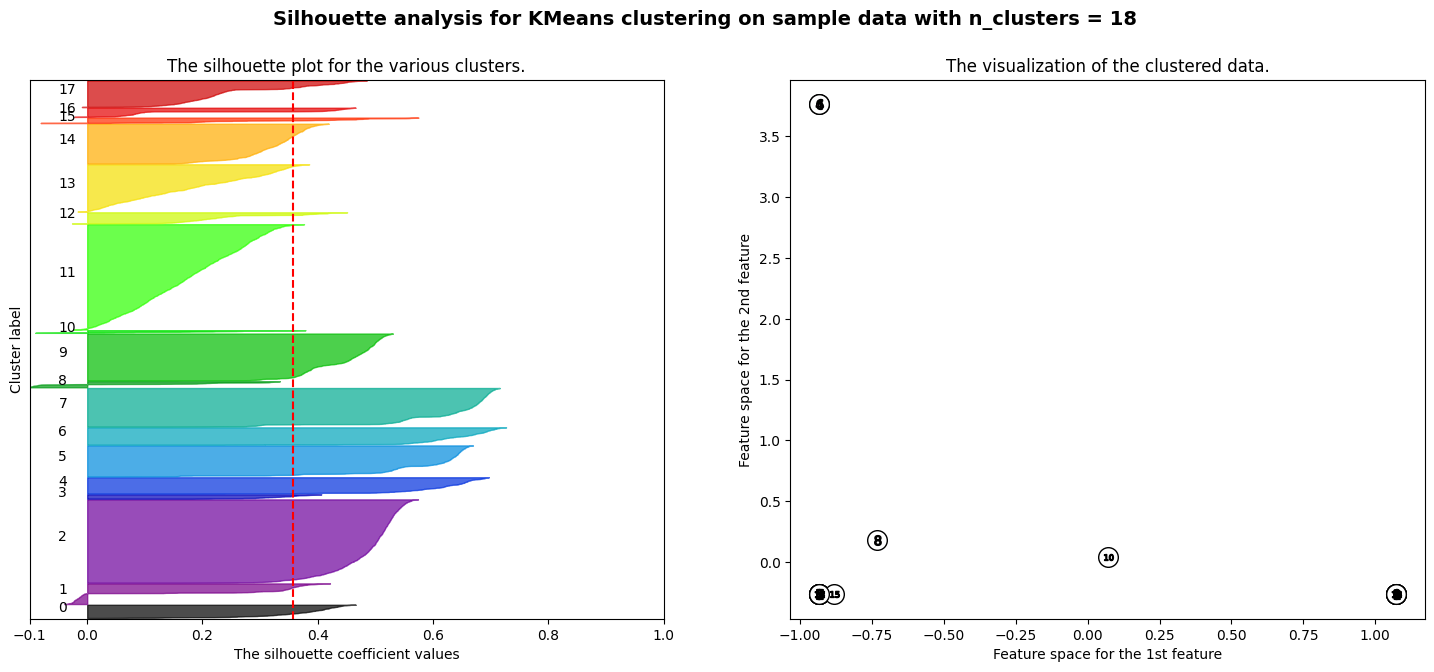

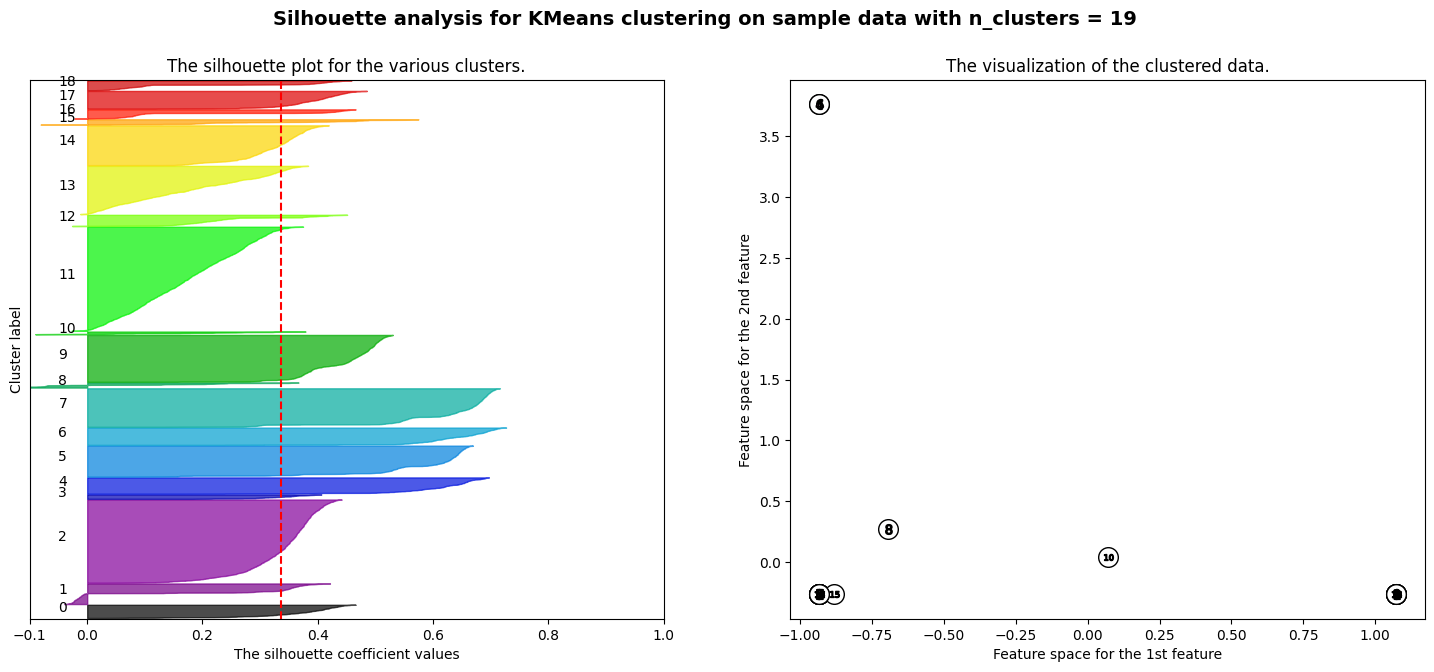

In [85]:
range_n_clusters = [i for i in range(2,20)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [86]:
Cluster = KMeans(n_clusters= 10, n_init=10,random_state=10)
preds = Cluster.fit_predict(X)

update_report('KMeans', 'Default', pd.Series(preds).nunique(), silhouette_score(X,preds), davies_bouldin_score(X,preds), calinski_harabasz_score(X,preds))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ***ML Model - 2***

###***Density-based spatial clustering of applications with noise (DBSCAN)***

DBSCAN is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common, and most commonly cited, clustering algorithms

In [87]:
dbscan = DBSCAN(eps=0.5, min_samples=15).fit(X)
preds = dbscan.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
silhouette_score(X,preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.10331365204468808

In [89]:
davies_bouldin_score(X,preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.4024849397262542

In [90]:
calinski_harabasz_score(X,preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


478.4525559749937

In [91]:
pd.Series(preds).nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


23

In [92]:
update_report('DBSCAN','Default' ,pd.Series(preds).nunique(), silhouette_score(X,preds), davies_bouldin_score(X,preds), calinski_harabasz_score(X,preds))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ***ML Model - 3***

### ***Hierarchical Agglomerative Clustering*** :->

A Hierarchical clustering method works via grouping data into a tree of clusters. Hierarchical clustering begins by treating every data point as a separate cluster. Then, it repeatedly executes the subsequent steps:

1. Identify the 2 clusters which can be closest together, and
2. Merge the 2 maximum comparable clusters. We need to continue these steps until all the clusters are merged together.

In Hierarchical Clustering, the aim is to produce a hierarchical series of nested clusters. A diagram called Dendrogram (A Dendrogram is a tree-like diagram that statistics the sequences of merges or splits) graphically represents this hierarchy and is an inverted tree that describes the order in which factors are merged (bottom-up view) or clusters are broken up (top-down view).

 ***Hierarchical Agglomerative Clustering (HAC)*** is also known as the bottom-up approach. A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


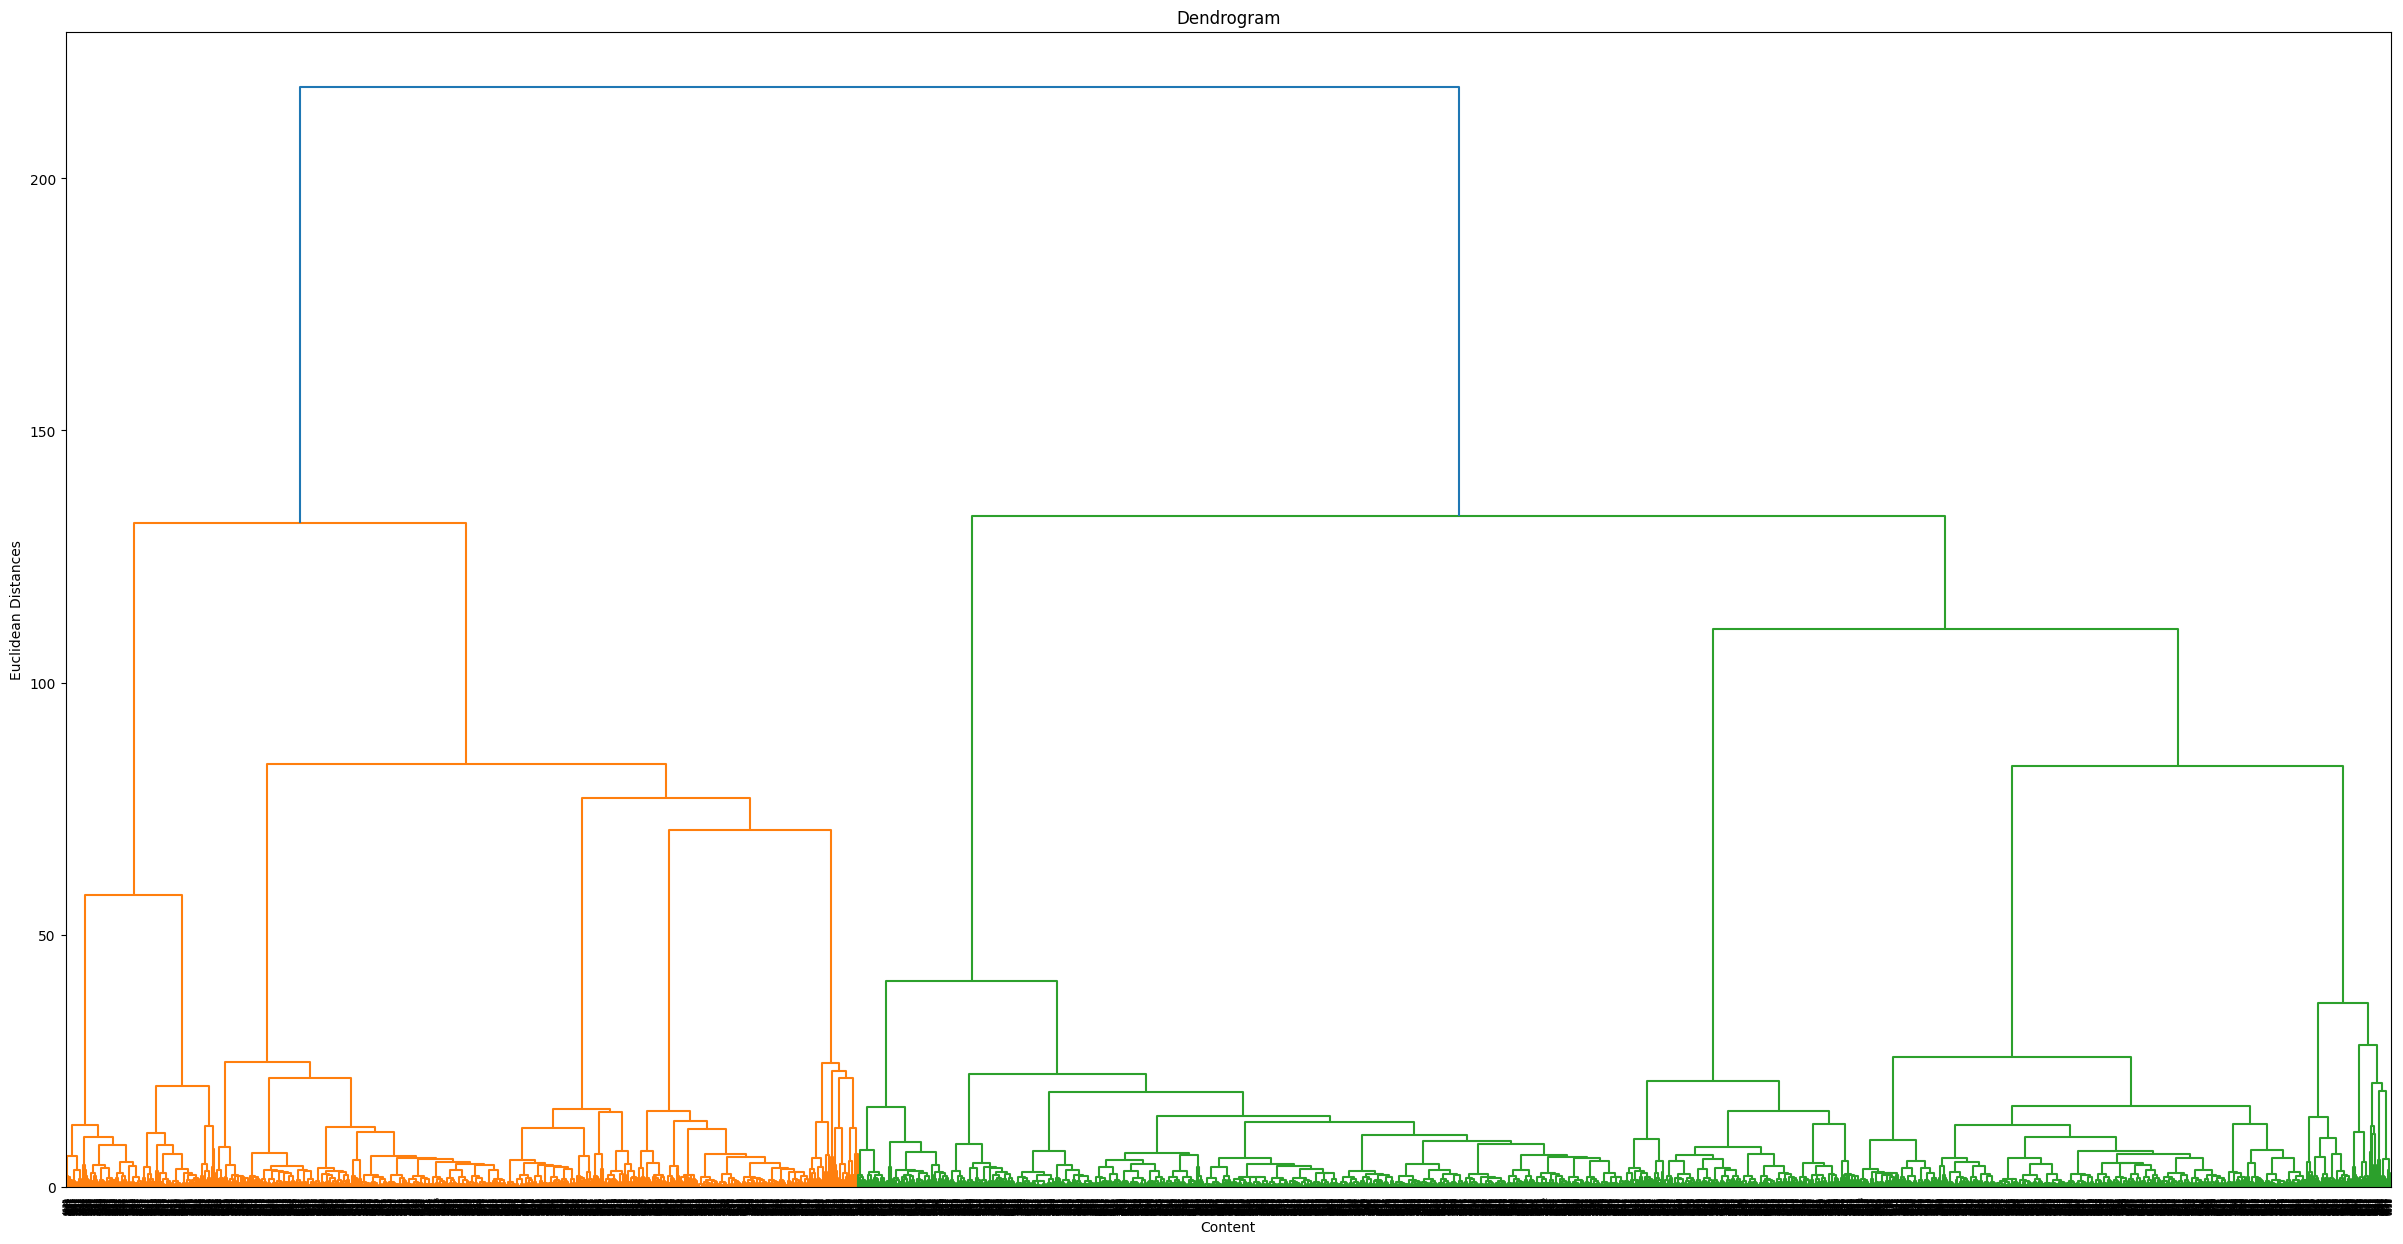

In [93]:
plt.figure(figsize=(30,15))
hier_ward_euc = sch.linkage(X, method = 'ward', metric = 'euclidean')
dendrogram = sch.dendrogram(hier_ward_euc)
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

FROM DENDOGRAM, a distance of  45-50 appears to have well defined trees.

Choosing the appropiate distance to Cluster

### ***Agglomerative Clustering***

The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It's also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster.

In [94]:
clusters = []
scores = []
distances = []
for i in np.arange(5,200,5):
  hc = AgglomerativeClustering(n_clusters = None, distance_threshold = i, affinity = 'euclidean', linkage = 'ward')
  y_hc = hc.fit_predict(X)
  clusters.append(hc.labels_.max()+1)
  if (hc.labels_.max()+1 >=2) :
    scores.append(silhouette_score(X, y_hc))
  else:
    scores.append(1)
  distances.append(i)

Hierarchical = pd.DataFrame({'Clusters': clusters,
                             'Silhouette Scores': scores,
                             'Distance': distances})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Distance vs Silhouette Scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

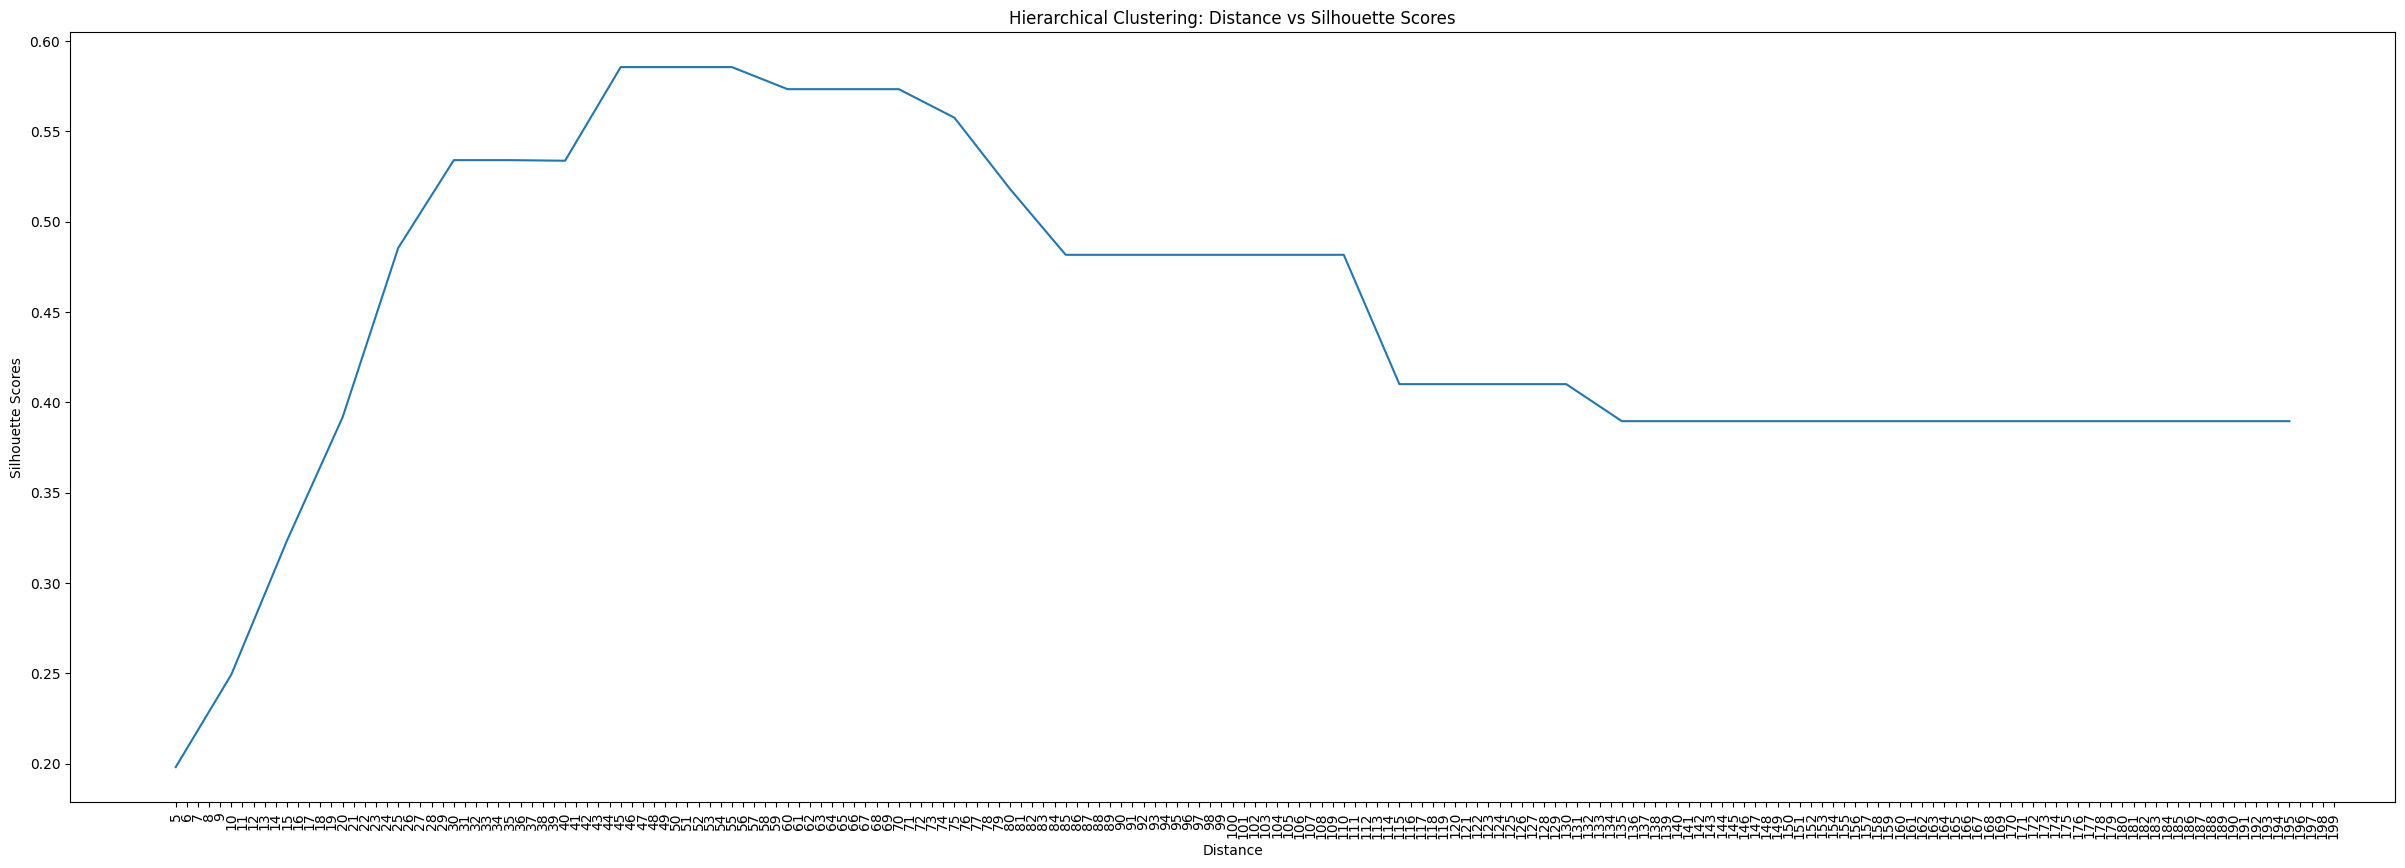

In [95]:
from matplotlib.pylab import tight_layout
plt.figure(figsize =(30,10))
sns.lineplot(x = 'Distance', y = 'Silhouette Scores' , data = Hierarchical)
a = plt.title('Hierarchical Clustering: Distance vs Silhouette Scores')
_ = plt.xticks(np.arange(5,200,1),rotation = 90)

tight_layout

In [96]:
Hierarchical.sort_values('Silhouette Scores', ascending = False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Clusters,Silhouette Scores,Distance
8,10,0.585497,45
9,10,0.585497,50
10,10,0.585497,55
11,9,0.573276,60
12,9,0.573276,65


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


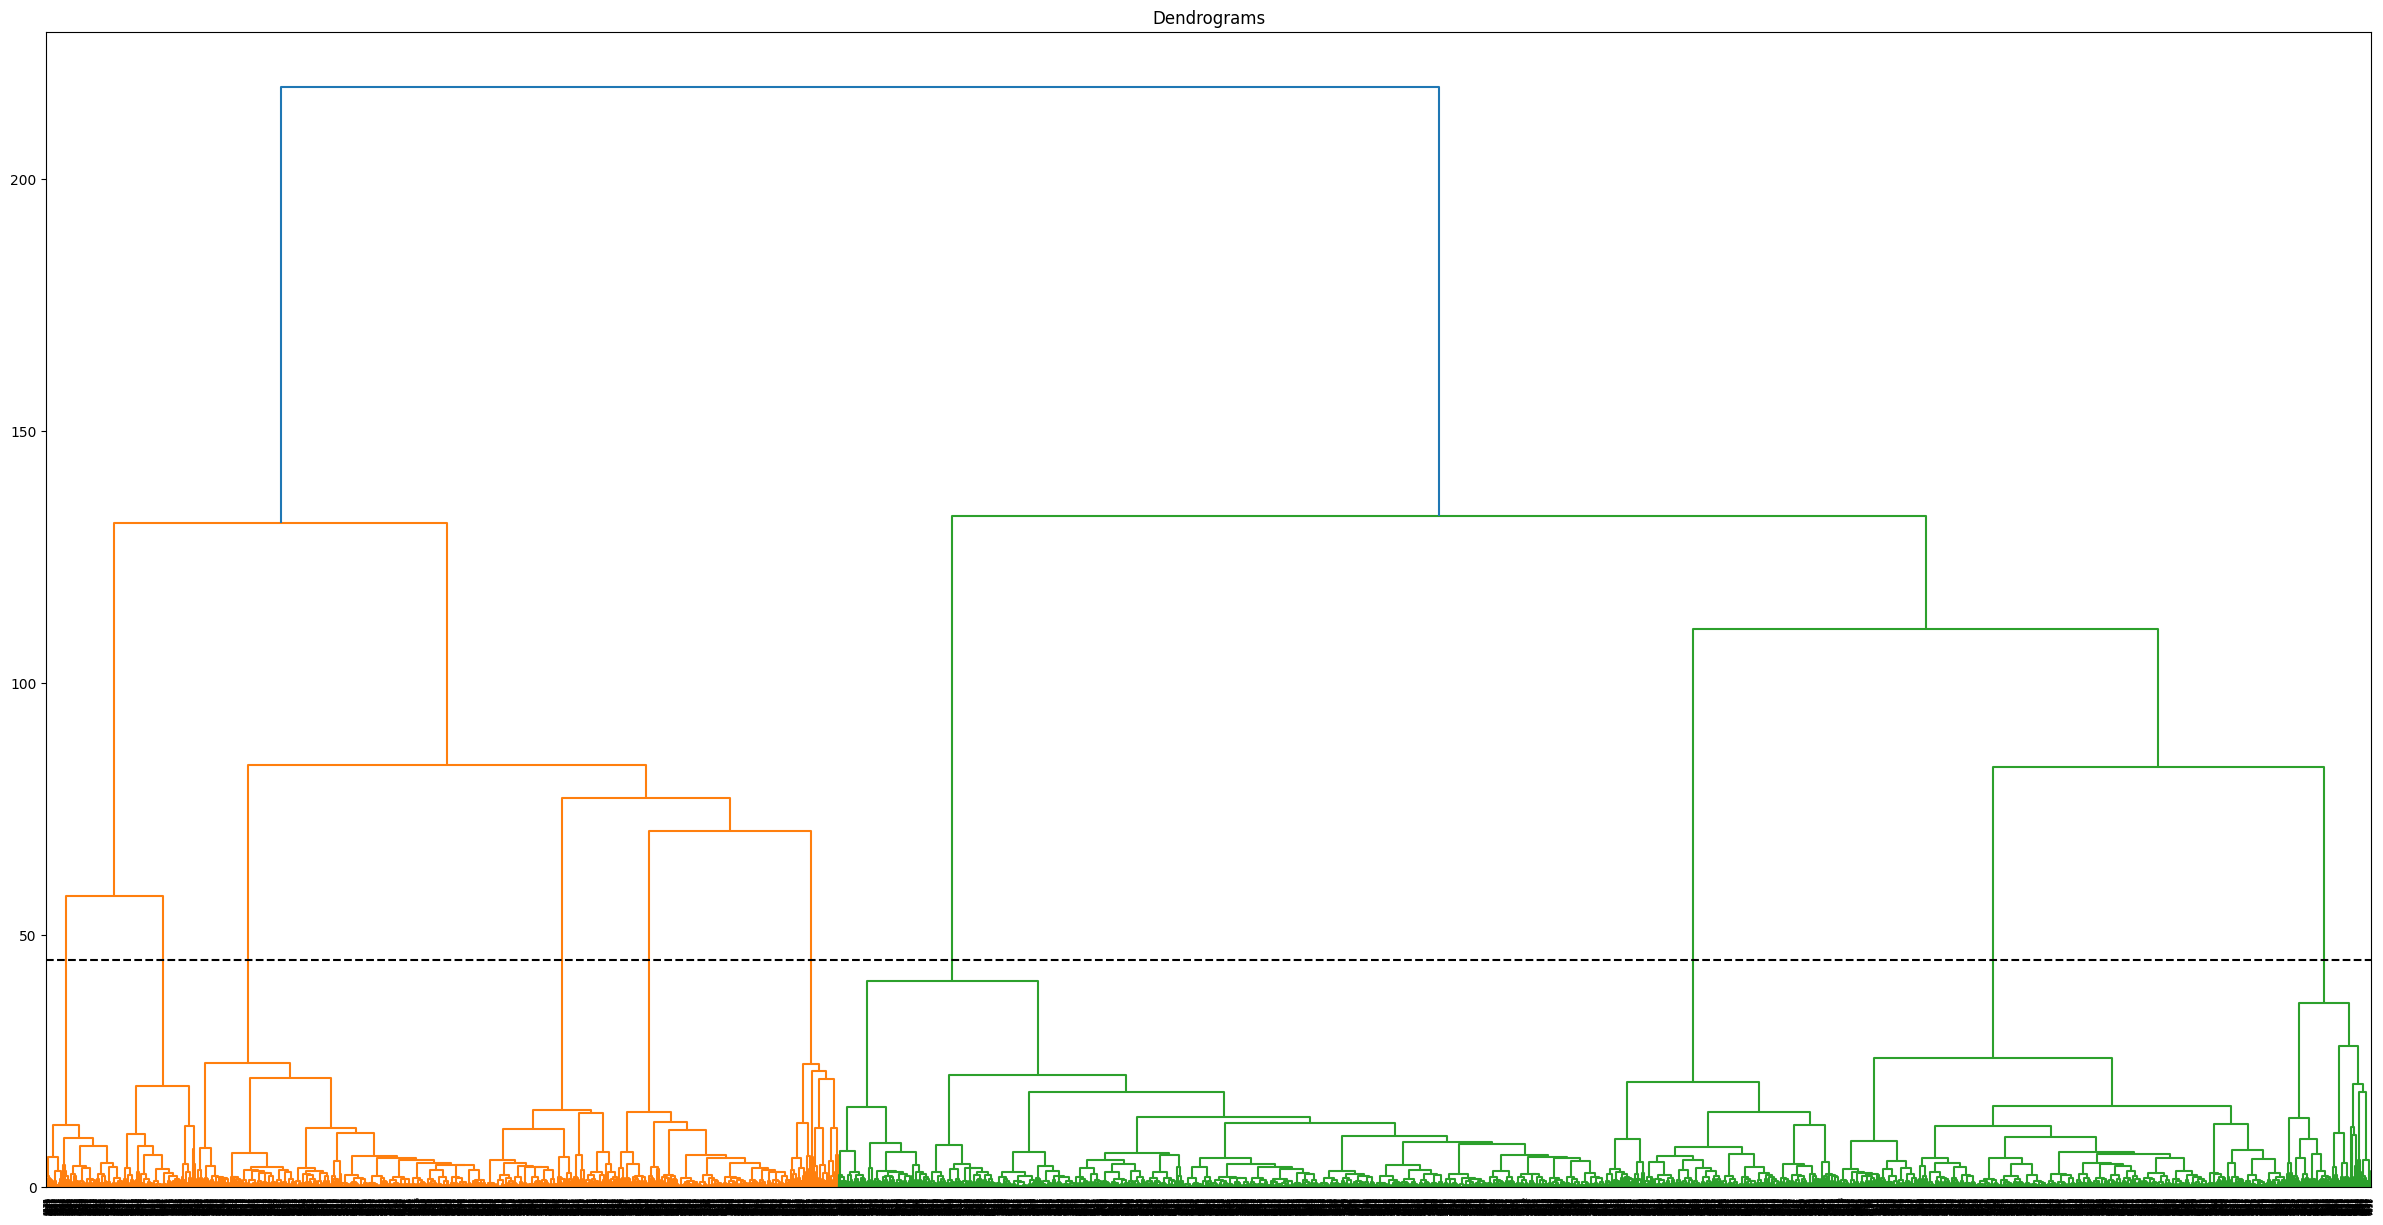

In [97]:
plt.figure(figsize =(30,15))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y = 45, color='black', linestyle='--')

In [98]:
hc = AgglomerativeClustering(n_clusters = None, distance_threshold = 45, affinity = 'euclidean', linkage = 'ward')
preds = hc.fit_predict(X)

update_report('Hierarchical Agglomerative','Distance = 45', pd.Series(preds).nunique(), silhouette_score(X,preds), davies_bouldin_score(X,preds), calinski_harabasz_score(X,preds))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ***Final Clustering Report***

In [99]:
# Visualizing evaluation Metric Score chart

pd.DataFrame(Cluster_Report)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Algorithm,Parameters,Clusters,Silhouette Coefficient,Davies-Bouldin Index,Calinski-Harabasz Score
0,KMeans,Default,10,0.593282,0.704477,5108.510372
1,DBSCAN,Default,23,0.103314,1.402485,478.452556
2,Hierarchical Agglomerative,Distance = 45,10,0.585497,0.771286,4853.296221


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. ***Silhouette Coefficient*** - Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

  1: Means clusters are well apart from each other and clearly distinguished.

  0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

  -1: Means clusters are assigned in the wrong way.

  Silhouette Score = (b-a)/max(a,b)

  where

  a= average intra-cluster distance i.e the average distance between each point within a cluster.

  b= average inter-cluster distance i.e the average distance between all clusters.

2. ***Davies-Bouldin Score*** - The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

  The minimum score is zero, with lower values indicating better clustering.

3. ***Calinski-Harabasz Score*** - It is also known as the Variance Ratio Criterion.

  The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.




### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose ***K Means Clustering*** from the above models as my final prediction model because
1. Silhouette Coefficient is better than the other two models.
2. Davies-Bouldin Index is lower than the other two models. Lower values indiacating better clustering.
3. Calinski-Harabasz Score is much decent than the other two models.

# **Conclusion**

1. There are 5377 Movies and 2410 TV Shows in the given dataset.

  Movie contains 69% of the data where as TV Show contains 21% of the data.

2. Number of Movies directed by director is : 5214
  
  Number of TV Shows directed by director is : 184
  
  Alastair Fothergill directed 3 TV Shows, higher than anyone in the given dataset.
  
  Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the given dataset.

3. Total number of TV Show Actors : 13585
  
  Total number of Movie Actors : 23049
  
  Takahiro Sakurai acted in highest number of TV Shows.
  
  Anupam Kher acted in 42 movies followed by Shahrukh Khan - 35 and Om Puri, Naseeruddin Shah - 30

4. The highest number of Movies / TV shows are with United States, followed by India and United Kingdom.
  
  United States - 705 TV Shows - 1850 Movies
  
  India - 71 TV Shows - 852 Movies
  
  United Kingdom - 204 TV Shows - 193 Movies
  
  63.06% of Movies and TV Shows by Top 10 countries.

5. Words like "Christmas", "Love", "World", "Man", "Story", "Life", "Girl", "Movie", "One", "Time" are very common word which appears most of the time in 'Title' column.

6. Oldest release year of Movies/TV Shows : 1925

  Latest release year of Movies/TV Shows : 2021

  Highest number of TV Shows released in the year 2020 - 457

  Highest number of Movies released in the year 2017 - 744

7. Most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).

  Highest number of rating given for the Movies as compared to TV Shows because number of Movies are greater than number of TV Movies.

8. Highest number of Genre belongs from International Movies, Dramas, Comedies,International TV Shows respectively.
  Least number of Genre belongs from Docuseries, Kid's TV, Crime TV Shows, Thrilers respectively.

9. Most of the common words present in 'Description' column are "family", "find", "life", "new", "world", "take".

10. ***K Means Clustering***
  
  From the elbow graph and silhouette analysis, the best model has a silhouette score of 0.593282 produced with 10 Clusters using K Means Algorithm
  
  The model also had a Davies-Bouding Index of 0.704477 and Calinski-Harabasz Score of 5108.510372

11. ***DBSCAN***

  DBSCAN clustered the data into 23 clusters with a silhouette score 0.103314

  The model also had a Davies-Bouding Index of 1.402485 and Calinski-Harbaz Score of 478.452556

12. ***Hierrarchial Agglomerative***

  Using dendograms and comparing various distance thresholds, a distance of 45 produced the highest silhouette score of 0.585497 with 10 clusters.
  
  The model also had a Davies-Bouding Index of 0.771286 and Calinski-Harbaz Score of 4853.296221

***I choose K Means Clustering from the above models as my final prediction model because***

1. ***Silhouette Coefficient is better than the other two models.***
2. ***Davies-Bouldin Index is lower than the other two models. Lower values indiacating better clustering.***
3. ***Calinski-Harabasz Score is much decent than the other two models.***







### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***